# ACSE-7 (Inversion and Optimisation)  <a class="tocSkip"></a>

## Lecture 3: Gradient Based Methods  <a class="tocSkip"></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#One-dimensional-methods-(recap-from-ACSE-3)" data-toc-modified-id="One-dimensional-methods-(recap-from-ACSE-3)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>One-dimensional methods (recap from ACSE-3)</a></span></li><li><span><a href="#Newton's-method-in-multiple-dimensions" data-toc-modified-id="Newton's-method-in-multiple-dimensions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Newton's method in multiple dimensions</a></span><ul class="toc-item"><li><span><a href="#Local-Convergence-for-Newton's-method" data-toc-modified-id="Local-Convergence-for-Newton's-method-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Local Convergence for Newton's method</a></span></li></ul></li><li><span><a href="#Line-Search-Methods" data-toc-modified-id="Line-Search-Methods-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Line Search Methods</a></span><ul class="toc-item"><li><span><a href="#Wolfe-Conditions-and-a-Gradient-Angle-Condition-(*)" data-toc-modified-id="Wolfe-Conditions-and-a-Gradient-Angle-Condition-(*)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Wolfe Conditions and a Gradient-Angle Condition (*)</a></span></li><li><span><a href="#Line-Search-for-Newton's-method" data-toc-modified-id="Line-Search-for-Newton's-method-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Line Search for Newton's method</a></span></li><li><span><a href="#Scale-invariance" data-toc-modified-id="Scale-invariance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Scale invariance</a></span></li></ul></li><li><span><a href="#Trust-Region-Methods" data-toc-modified-id="Trust-Region-Methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Trust Region Methods</a></span><ul class="toc-item"><li><span><a href="#Trust-Region-Methods---derivation-(*)" data-toc-modified-id="Trust-Region-Methods---derivation-(*)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Trust Region Methods - derivation (*)</a></span></li><li><span><a href="#Trust-Region-Methods---summary" data-toc-modified-id="Trust-Region-Methods---summary-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Trust Region Methods - summary</a></span></li></ul></li><li><span><a href="#Quasi-Newton-Methods" data-toc-modified-id="Quasi-Newton-Methods-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Quasi-Newton Methods</a></span><ul class="toc-item"><li><span><a href="#The-Dennis-Moré-Theorem-(*)" data-toc-modified-id="The-Dennis-Moré-Theorem-(*)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The Dennis-Moré Theorem (*)</a></span></li></ul></li><li><span><a href="#Newton-Gauss" data-toc-modified-id="Newton-Gauss-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Newton-Gauss</a></span><ul class="toc-item"><li><span><a href="#Nonlinear-regression" data-toc-modified-id="Nonlinear-regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Nonlinear regression</a></span><ul class="toc-item"><li><span><a href="#Nonlinear-Example:-Exponential-Population-Growth-" data-toc-modified-id="Nonlinear-Example:-Exponential-Population-Growth--6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Nonlinear Example: Exponential Population Growth <a class="tocSkip/"></a></a></span></li></ul></li><li><span><a href="#Convergence-for-overdetermined-problems-(*)" data-toc-modified-id="Convergence-for-overdetermined-problems-(*)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Convergence for overdetermined problems (*)</a></span></li><li><span><a href="#Convergence-for-underdetermined-problems-(*)" data-toc-modified-id="Convergence-for-underdetermined-problems-(*)-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Convergence for underdetermined problems (*)</a></span></li></ul></li><li><span><a href="#List-of-Definitions" data-toc-modified-id="List-of-Definitions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>List of Definitions</a></span></li></ul></div>

## Summary <a class="tocSkip"></a>
In this lecture we discuss Newton's method in multiple dimensions for solving nonlinear root-finding and optimisation problems. By using derivative information, Newton's method is more efficient than methods that do not use this information (e.g. Conjugate Gradient) and shows quadratic local convergence. Local convergence means that this is only seen near the solution. Global convergence, i.e. convergence starting from any point within the domain, can be obtained by combining Newton's method with line search or trust region methods. Trust region methods, although generally more complex than line search methods, are often more robust, in particular when dealing with non-convex problems. Computing the required derivative information, the Jacobian in root-finding problems or the Hessian for optimisation, can be expensive for large problems. For this reason we discuss some quasi-Newton methods in which the Jacobian/Hessian does not need to be calculated exactly, but is approximated. In this category, Gauss-Newton methods are used to solve nonlinear least-squares problems. More general problems can be solved using quasi-Newton secant methods such as Broyden's method and BFGS which will be discussed in tomorrow's lecture.

### Important concepts: <a class="tocSkip"></a>
- one-dimensional methods covered in ACSE-3: Chord method, Newton's method and the secant method
- the role of the Jacobian, resp. Hessian in non-linear root-finding and optimisation problems
- line search methods that ensure sufficient decrease of the function value, and prevent step sizes that are too small
- the role of scaling of input parameters and output values, and the importance of scale invariance of the methods
- trust region methods which can be more robust than line search methods
- Newton Gauss (damped or the Levenberg-Marquard) for nonlinear least-square problems, in particular nonlinear regression

<font size="1pt">Some $\LaTeX$ definitions hidden in this cell (double-click to reveal)</font>
$
\newcommand\vec[1]{\mathbf{#1}}
\newcommand\mat[1]{\underline{\mathbf{#1}}}
\newcommand\R{\mathbb{R}}
\newcommand\todo[1]{\textcolor{red}#1}
$

In [2]:
# needs to be in separate cell!
%matplotlib inline

In [3]:
# these two lines ensure that imported modules are automatically reloaded when change
%load_ext autoreload
%autoreload 2
from lecture3 import *  # you need lecture3.py in the same folder

In [4]:
%%html
<style>
a.definition {
    color: blue;
    font-style: italic;
    font-weight: bold;
}
div.optional {
    background-color: #f0f8ff;
    border-color: #e0f0ff;
    border-left: 5px solid #e0f0ff;
    padding: 0.5em;
}
</style>

# One-dimensional methods (recap from ACSE-3)

In this section we will briefly revise the methods to solve $F(x)=0$ for nonlinear functions $F:\R\to\R$ that were discussed in lecture 4 of ACSE-3. (Side note: we have replaced the $f$ in the lecture notes of ACSE-3, with a capital $F$, since in the next section we would like to extend this theory to solve $F(x)=0$ for multi-dimensional functions $F:\R^n\to \R^n$, and we will reserve $f(x)$ for functions $f:\R^n \to\R$ that we want to minimize.)

We started with the simple idea of find a fixed point $G(x)=x$ for the function $G$ defined as

$$
  G(x) = x + F(x).
$$


A <a class="definition" href="#definitions" id="Picarditeration">Picard iteration</a> is an iterative method to find such a fixed point, by iteratively applying:

$$
  x^{(i+1)} = G(x^{(i)})
$$

or, in terms of $F$:

$$
  x^{(i+1)} = x^{(i)} + F(x^{(i)})
$$

As we saw however in ACSE-3, this method would often not converge depending on the steepness of $F$.

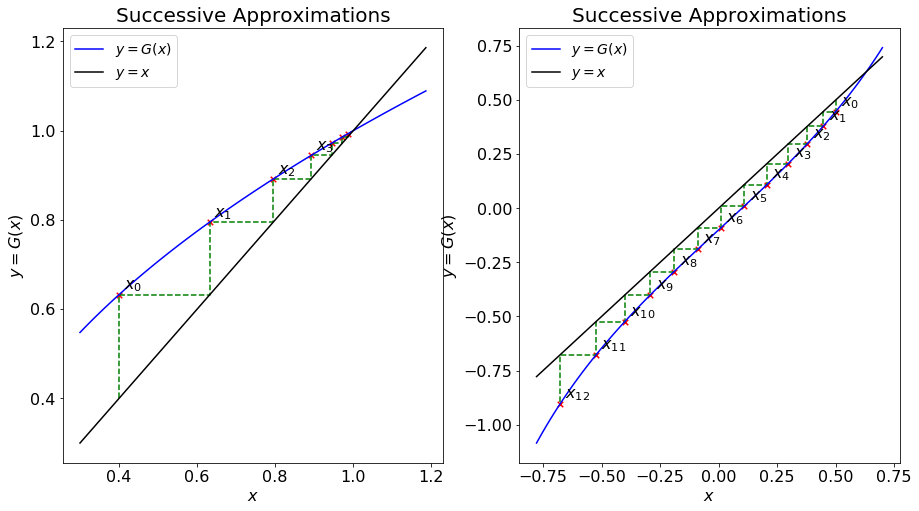

In [5]:
def picard_method(G, x_0, atol = 1.e-5, maxiter=100):
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        y_n.append(G(x))
        # Picard iteration:
        x = G(x)
        if abs(x - x_n[-1]) < atol:
            break
    
    return x_n, y_n


fig, ax = plt.subplots(1, 2, figsize=(15, 8))

def G(x):
    return np.sqrt(x)

x_guess = 0.4
x_n, y_n = picard_method(G, x_guess, atol=1.0e-2, maxiter=6)
plot_picard_iteration(ax[0], x_n, y_n, G, max_labels=3, flabel=r'$y$')

def G(x):
    return np.tan(x) - .1

# start very cl/ose to root using value found below - need to set atol lower (i.e. strict) otherwise stops at first it.
x_guess = 0.5
x_n, y_n = picard_method(G, x_guess, atol=1.0e-6, maxiter=12)
plot_picard_iteration(ax[1], x_n, y_n, G, max_labels=12, flabel=r'$y$')

With a simple modification of $G$ to $G(x)=x - m F(x)$ for a fixed $m\in\R$, or

$$
  x^{(i+1)} = x^{(i)} - m F(x^{(i)})
$$

the convergence of the method could be controlled better, where we showed that the method would converge if

$$
  0 \leq m F'(x) \leq 2
$$

This method is sometimes known as the <a class="definition" href="#definitions" id="Chordmethod">Chord method</a>. We did see however that the convergence rate, how _fast_ the iterative solution converges to the solution, is highly dependent on the choice of $m$.

The slope marker contains the value 1/m =  -0.4
The slope marker contains the value 1/m =  -1.0


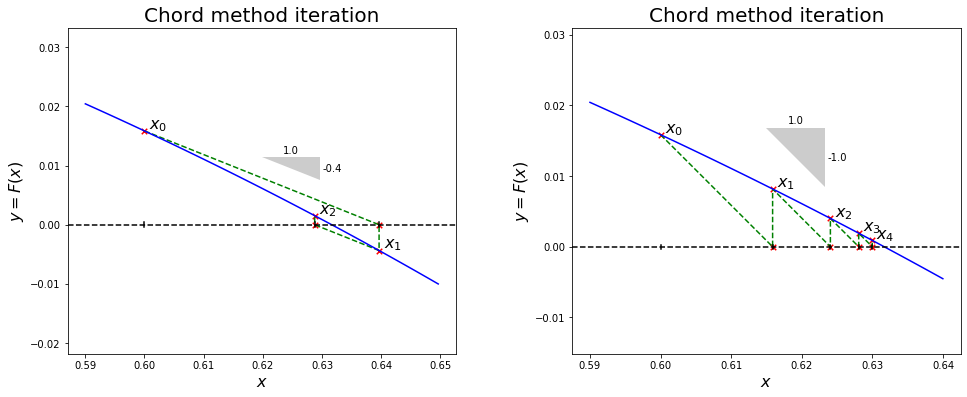

In [17]:
def chord_method(F, m, x_0, atol = 1.e-5, maxiter=100):
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        y_n.append(F(x))
        # Chord update:
        x = x - m * F(x)
        if abs(x - x_n[-1]) < atol:
            break
    
    return x_n, y_n       


def F(x):
    return x - np.tan(x) + .1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(wspace=0.3)

ax1.axis('equal')
x0 = 0.6
m = -2.5
x_n, y_n = chord_method(F, m, x0, atol=1.e-2, maxiter=4)
plot_iteration(ax1, x_n, y_n, F)
plot_triangle(ax1, x_n, y_n, m)
ax1.set_title("Chord method iteration", fontsize=20)
print('The slope marker contains the value 1/m = ',1./m)

m = -1.
ax2.axis('equal')
x_n, y_n = chord_method(F, m, x0, atol=1.e-3, maxiter=4)
plot_iteration(ax2, x_n, y_n, F)
plot_triangle(ax2, x_n, y_n, m)
ax2.set_title("Chord method iteration", fontsize=20)
print('The slope marker contains the value 1/m = ',1./m)

Rather than choosing a fixed $m$, we may also choose an $m^{(i)}$ that changes per iteration:

$$
  x^{(i+1)} = x^{(i)} - m^{(i)} F(x^{(i)})
$$

The choice $m=1/F'(x)$ leads to <a class="definition" href="#definitions" id="Newtonsmethod">Newton's method</a> (also known as the <a class="definition" href="#definitions" id="NewtonRaphsonmethod">Newton-Raphson method</a>):

$$
  x^{(i+1)} = x^{(i)} - \frac{F(x^{(i)})}{F'(x^{(i)})}
$$

As we saw in ACSE-3, this choice leads to quadratic convergence of the method.

The analytical derivative $F'(x)$ might not always be available in which case we have to (numerically) approximate it. This is typically based on the (finite difference) formula:

$$
  F'(x) = \frac{F(x+h)-F(x)}{h} + \mathcal{O}(h)
$$

Rather than using multiple (potentially costly) function evaluations per iterations, we can instead choose to reuse the function evaluations from previous iterations for this:

$$
  F'(x^{(i)}) \approx  \frac{F(x^{(i)}) - F(x^{(i-1)})}{x^{(i)}-x^{(i-1)}} =: \frac 1{m^{(i)}}
$$

which results in an algorithm called the <a class="definition" href="#definitions" id="secantmethod">secant method</a>.

Approximating the derivative in general leads to a reduction in the order of convergence of the method. In the case of the secant method it can be shown that the order of convergence drops from $2$ (i.e. quadratic convergence) to the golden ratio $\tfrac 12(1+\sqrt 5)\approx 1.618$.

# Newton's method in multiple dimensions

To extend Newton's (Newton-Raphson) method to multiple dimensions, solving $\vec F(\vec x)=\vec 0$ for a function $\vec F:\R^n\to\R^n$, we derive it again from first principles. 

We start by writing down the Taylor expanson of $\vec F$ around the current best guess $\vec x^{(i)}$:

\begin{align*}
  \vec F(\vec x) &= \vec F(\vec x^{(i)}) + \sum_j\frac{\partial \vec F(\vec x^{(i)})}{\partial x^{(i)}_j} \left(x_j - x^{(i)}_j\right) + \mathcal{O}\left(\left(\vec x - \vec x^{(i)}\right)^2\right) \\[5pt]
    &= \vec F(\vec x^{(i)}) + \vec F'(\vec x^{(i)}) \left(\vec x - \vec x^{(i)}\right) + \mathcal{O}\left(\left(\vec x - \vec x^{(i)}\right)^2\right)
\end{align*}

where $\vec F'$ is defined as the $n\times n$ gradient matrix:

$$
\newcommand\gf[2]{\frac{\partial F_{#1}(\vec
x)}{\partial x_{#2}}}
  \vec F'(\vec x) = \begin{pmatrix}
  \gf 11 & \gf 12 & \dots & \gf 1n \\
  \gf 21 & \gf 22 & \dots & \gf 2n \\
  \vdots & \vdots & \ddots & \vdots \\
  \gf n1 & \gf n2 & \dots & \gf nn
  \end{pmatrix}.
$$

This matrix is also referred to as the <a class="definition" href="#definitions" id="Jacobian">Jacobian</a>. Note that this matrix is not symmetric, and in some literature the  Jacobian is defined as the transpose of the above. In our definition the matrix vector multiplication of $\vec F'$ with a direction vector $\vec p$ gives the gradient in the direction of $\vec p$ (cf. the [directional derivative](https://en.wikipedia.org/wiki/Directional_derivative)).

Dropping the higher order terms, we obtain a linearization of $\vec F$ around $\vec x^{(i)}$ given by

$$
  \vec F_{\text{linear}}(\vec x) = \vec F(\vec x^{(i)}) + \vec F'(\vec x^{(i)}) \left(\vec x - \vec x^{(i)}\right)
$$

We now choose our next iterate $\vec x^{(i+1)}$ such that it satisfies:

$$
  \vec F_{\text{linear}}(\vec x^{(i+1)}) = 0
$$

which leads to the following linear system:

$$
  \vec F'(\vec x^{(i)}) \vec p = -\vec F(\vec x^{(i)})
  \;\;\; \text{ with } \;\;\; \vec p = \vec x^{(i+1)} - \vec x^{(i)}
$$

Thus the $n$-dimensional Newton's method consists of the following steps for each iteration:

* evaluate $\vec F(\vec x^{(i)})$
* evaluate $\vec F'(\vec x^{(i)})$
* solve $\vec F'(\vec x^{(i)}) \vec p = -\vec F(\vec x^{(i)})$
* update $\vec x^{(i+1)} = \vec x^{(i)} + \vec p$

The algorithm can also be used to find stationary points of a function $f:\R^n\to\R$; By setting $\vec F(x)=f'(\vec x)$ we can find a point $\vec x\in\R^n$ sucht that $f'(\vec x)=0$. Here the usual caveat applies that not every stationary point of $f$ is a local minimum of $f$ (see the necessary and sufficient conditions of lecture 2).

Note that if $\vec F(x)=f'(\vec x)$, then the gradient (matrix) of $\vec F$ is the Hessian (second derivative) of $f$. For this particular case we also know that $\vec F'$ is symmetric:

$$
  \vec F'(\vec x) = \vec F'(\vec x)^T = f''(\vec x)
$$

where $f''$ in the case of multi-dimensional independent variables denotes the Hessian matrix.

Depending on whether Newton's method is used for a root-finding problem of the form $\vec F(\vec x)=0$, or whether it's used in optimisation (minimisation of $f$), this matrix is therefore referred to either as the Jacobian or the Hessian matrix.

For general functions $f$, the Hessian will not always be SPD. In particular it might not even be invertible, in which case Newton's method immediately breaks down. As we will see later on, the fact that the Hessian is not SPD means that the function $f$ does not necessarily decrease in the chosen direction $\vec p$!

## Local Convergence for Newton's method
In one dimension the strong point of Newton's method is the following: assuming we're close enough to a root/stationary point the method will converge quadratically to it. The same holds for Newton's method in multiple dimensions.
For a more precise mathematical statement of this *local convergence* property, we have to make the following assumptions:

1. $F$ is differentiable and its derivative is [<a class="definition" href="#definitions" id="Lipschitzcontinuous">Lipschitz continuous</a>](https://en.wikipedia.org/wiki/Lipschitz_continuity)

$$
  \| F'(\vec x) - F'(\vec y) \| \leq \gamma \|\vec x - \vec y \|
$$

2. $F(\vec x^*) = 0$


3. $F'(\vec x^*)$ is nonsingular

In the context of optimisations where $F(\vec x)=f'(\vec x)$, assumption 1. is often phrased  as $f$ being *twice Lipschitz continously differentiable*:

$$
  \| f''(\vec x) - f''(\vec y) \| \leq \gamma \|\vec x - \vec y \|
$$

Assumption 2. implies that $\vec x^*$ is a stationary point and if in addition to 3. we assume that $F'(\vec x)=f''(\vec x)$ is SPD then we know (see lecture 2) that $f$ has a local minimum at $\vec x^*$.

Under these assumptions it can be proven, both for general nonlinear inversions $F(\vec x)=0$  and optimisation problems, that for a starting point $\vec x^{(0)}$ close enough to $\vec x^*$, Newton's method converges quadratically to $\vec x^*$:

$$
  \| \vec x^{(n+1)} - \vec x^* \| \leq K \| \vec x^{(n)} - \vec x^* \|^2
$$

Unfortunately it is not generally possible to tell _how close_ the starting point needs to be to ensure this quadratic convergence.

# Line Search Methods

The steepest descent method for the minimisation of a function $f$, introduced in lecture 2, took the following form

$$
  \vec x^{(i+1)} = \vec x^{(i)} + \lambda \vec p^{(i)}
$$

where $\vec p^{(i)}=-f'(\vec x^{(i)})$, i.e. a step direction opposite to the gradient of $f$ in $\vec x^{(i)}$. 

The conjugate gradient method was also shown to take this form with a different choice of $\vec p^{(i)}$ (obtained by projecting the gradient to be $A$-orthogonal to previous search directions). Finding a suitable $\lambda$ is equivalent to finding a suitable new iterate $\vec x^{(i)}$ along the line spanned by the search direction $\vec p^{(i)}$ and is called a <a class="definition" href="#definitions" id="linesearch">line search</a>.

In lecture 2, we simplified the analysis by assuming that $f$ is quadratic (and we saw that this quadratic minimisation problem is equivalent to a linear inversion). For this quadratic case we can easily find an optimal $\lambda$ such that $f(\vec x^{(i+1)})$ is minimal; $f$ restricted to the line spanned by $\vec p^{(i)}$ becomes a simple one-dimensional quadratic function (recall that we used the notation $\hat f$ for this function). Note however that this is not the case for general nonlinear functions $f$. There we would have to solve a general one-dimensional nonlinear minimisation problem, typically requiring many evaluations of $f$, and this would have to be repeated for every iteration of the full dimensional problem. For this reason, in practice we use line search methods that do not necessarily result in the smallest possible new value $f(\vec x^{(i+1)})$, but a new value that is _sufficiently_ smaller than the previous value $f(\vec x^{(i)})$.

We define a <a class="definition" href="#definitions" id="descentdirection">descent direction</a>, to be any direction $\vec p$ such that

$$
  \left.\frac d{dt}\right|_{t=0} f(\vec x+t\vec p) = f'(\vec x)^T \vec p \lt 0,
$$

that is any direction in which $f$ decreases for infinitesimally small step size. Clearly this is satisfied for the method of *steepest* descent, where $\vec p=-f'(\vec x)$. We will however consider a number of other methods for which in each iteration a search direction $\vec p^{(i)}$ is used that is a descent direction.

If $\vec p^{(i)}$ is a descent direction, it is always possible to choose a $\lambda$ small enough such that

$$
  f(\vec x^{(n+1)}) \lt f(\vec x^{(n)}).
$$

This means that if $f$ is bounded from below, the series $f(\vec x^{(0)}), f(\vec x^{(1)}), \dots$ converges
to a value

$$
  \lim_{k\to\infty} f(\vec x^{(k)}) = f^*
$$

It is important to realize however that this does not necessarily mean that the method converges to a local minimum of $f$, as we can observe in the following two examples of minimizing $f(x)=x^2$.

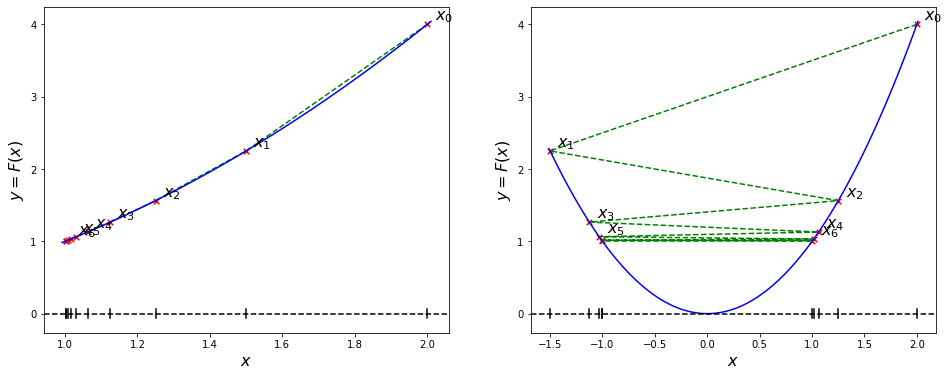

In [16]:
def f(x):
    return x**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

x_n =[1+2**-i for i in range(10)]
y_n =[f(x) for x in x_n]
plot_iteration(ax1, x_n, y_n, f, include_chords=False, left_extra=1.5)
ax1.set_ylabel('$f(x)$')

x_n =[(1+2**-i)*(-1)**i for i in range(10)]
y_n =[f(x) for x in x_n]
plot_iteration(ax2, x_n, y_n, f, include_chords=False)
ax2.set_ylabel('$f(x)$');

In both cases above, $\lim_{i\to\infty} f(x^{(i)})=1$ whereas of course the desired (local and global) minimum of $f$ is in $x=0$ with $f(0)=0$. In the left-hand case, the reason the algorithm stalls is that the step size $x^{(i+1)}-x^{(i)}$ is halved in each iteration, and does so before being sufficiently close to $x=0$. 
In the right-hand case, the step size does not go to zero, but the reduction in function value, $f(x^{(i+1)})-f(x^{(i)})$ does. Note that in both cases, with the appropriate choice of $\lambda$ these updates could be formulated as a steepest descent method since the chosen steps are always in the direction of the gradient.

It thus becomes clear that the requirement $f(\vec x^{(i+1)})\lt f(\vec x^{(i)})$ is not _sufficient_ to ensure convergence to a local minimum. It is not immediately obvious what a <a class="definition" href="#definitions" id="sufficientdecreasecriterion">sufficient decrease criterion</a> would look like. 

For any fixed value $\Delta f_{\text{min}}$ for a minimum decrease $f(\vec x^{(i+1)})-f(\vec x^{(i)})\lt-\Delta f_{\text{min}}$ the criterion will start failing as we approach a local minimum, simply because $f$ is already close enough to the minimum value that there is not enough room for $f$ to decrease any further. 
Similarly, if we're moving through an area of the domain where $f$ is very flat, we might be making large steps in $\vec x$ towards the desired minimum, but the change in $f$ will still be small. 

A more useful criterion, called the <a class="definition" href="#definitions" id="Armijiorule">Armijio rule</a>, therefore relates the change in $f$ to the expected change based on a linearisation of $f$:

$$
   f(\vec x^{(i)} + \lambda\vec p^{(i)}) - f(\vec x^{(i)}) \lt \alpha \lambda f'(\vec x^{(i)})^T \vec p^{(i)}
$$

where $\alpha$ is a small value (often chosen to be $10^{-4}$). This criterion is called the *Armijo rule*.

## Wolfe Conditions and a Gradient-Angle Condition (\*)

<div class="optional">
The Armijo rule ensures sufficient decrease when "overshooting" the local minimum (as in the right-hand figure of the example above), but does not really stop us from choosing arbitrarily small $\lambda$. In convergence proofs the Armijo rule is therefore often combined with a second condition that prevents stalling because of $\lambda$ being chosen too small. An example are the *Wolfe conditions*:

\begin{align}
f(x^{(i)} + \lambda\vec p^{(i)}) - f(x^{(i)}) &\leq c_1 \lambda f'(x^{(i)})^T \vec p^{(i)} \\[10pt]
f'(x^{(i)} + \lambda\vec p^{(i)})^T\vec p^{(i)} &\leq c_2 f'(x^{(i)})^T \vec p^{(i)}
\end{align}

The first Wolfe condition is the Armijo rule that requires sufficient decrease in $f$. The second Wolfe condition also demands there to be some decrease in the derivative of the new point. This prevents choosing arbitrarily small $\lambda$, as we can see in the following sketch: the blue line represent the function $f$ restricted to the search direction. The first Wolfe condition restricts to below the orange dashed line. To avoid excessively small steps, we demand the slope of $f$ in the search direction to have reduced to a fraction, $c_2$ of the original slope at $x^{(i)}$.
</div>

Second Wolfe condition satisfied in: 0.4479303974215962
In this point dfdx = -6.600000000000001 and c2*dfdx(0) = -6.6


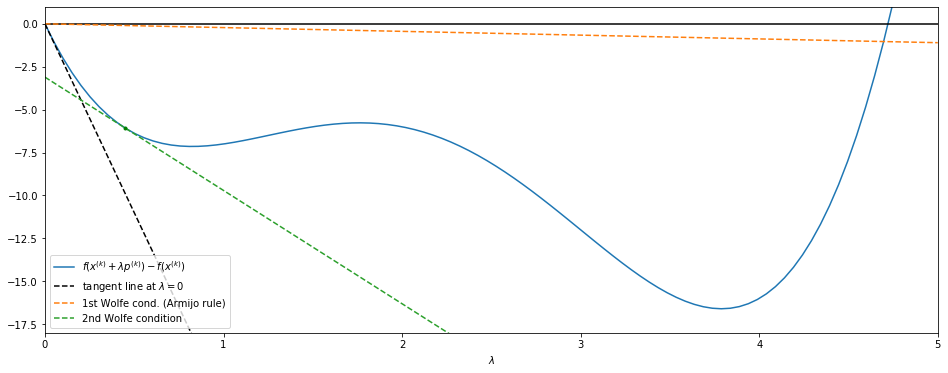

In [17]:
# coefficients for Wolfe conditions:
c1 = 0.01
c2 = 0.3

def f(x):
    return (x-1.5)*x*(x-3)*(x-4) - 4*x
def dfdx(x):
    return 4.0*x**3 - 25.5*x**2 + 45.0*x - 22.0
# second Wolfe condition: positive means satisfies condition
def wolfe2(x):
    return dfdx(x) - c2*dfdx(0)

# use Newton's method to find first point after x=0 that satisfies Wolfe 2
xwf2 = sop.newton(wolfe2, 0)
print("Second Wolfe condition satisfied in:", xwf2)
print("In this point dfdx = {} and c2*dfdx(0) = {}".format(dfdx(xwf2), c2*dfdx(0)))

x = np.linspace(0, 5, 100)
plt.figure(figsize=(16,6))
plt.plot(x, f(x), label='$f(x^{(k)}+\lambda p^{(k)})-f(x^{(k)})$')
plt.plot([0, x[-1]], [0,0], 'k-')
plt.plot([x[0], x[-1]], [x[0]*dfdx(0), x[-1]*dfdx(0)], 'k--', label='tangent line at $\lambda=0$')
plt.plot([x[0], x[-1]], [x[0]*c1*dfdx(0), x[-1]*c1*dfdx(0)], '--', label='1st Wolfe cond. (Armijo rule)')
plt.plot([x[0], x[-1]], 
         [f(xwf2)+(x[0]-xwf2)*c2*dfdx(0), f(xwf2)+(x[-1]-xwf2)*c2*dfdx(0)], '--',
         label='2nd Wolfe condition')
plt.plot(xwf2, f(xwf2), 'g.')
plt.axis([0, 5, -18, 1])
plt.xlabel('$\lambda$')
plt.legend();

<div class="optional">
Although the Wolfe conditions are sufficient conditions for the convergence of the steepest descent method, there is still one more condition needed for more general methods that are based on a descent direction $\vec p^{(i)}$ in every iteration. Although $f'(\vec x^{(i)})^T \vec p^{(i)} \lt 0$ implies that the angle $\theta^{(i)}$ between the negative gradient $-f'(\vec x^{(i)})$ and $\vec p$ is bounded by:

$$
  \cos(\theta^{(i)}) = \frac{-f'(\vec x^{(i)})^T \vec p^{(i)}}{\|f'(\vec x^{(i)})^T\| \|\vec p^{(i)}\|} > 0 \implies -90^\circ\lt\theta^{(i)}\lt90^\circ,
$$

it is possible that

$$
  \lim_{i\to\infty} \cos(\theta^{(i)}) = 0,
$$

in other words: although $\vec p^{(i)}$ is guaranteed to always have at least a component in the negative gradient direction, it is possible that it is slowly turning away from the negative gradient and thus for the method to stall.

In the following artificial example, where we are minimizing the trivial function $f(x)=x_0^2+x_1^2$, we choose a search direction that is composed of the negative gradient and a perpendicular component that grows bigger and bigger as $\|\vec x\|\to 1$. Therefore all search directions are descent directions, but they are slowly turning away from the negative gradient to become near orthogonal to it. Thus the iteration never converges to the minimum at $\vec x^*=(0,0)$ but keeps circling around whilst getting closer to the unit circle.
</div>

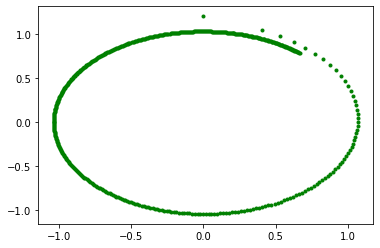

In [18]:
def linesearch_quad(f0, f1, fp0):
    # f = f0 + fp0*x + (f1-f0-fp0)*x**2
    # f' = fp0 + 2*(f1-f0-fp0)*x = 0
    return -fp0/(f1-f0-fp0)/2.

def silly_method(f, jac, x0, maxiter=100):
    x_n = []
    y_n = []
    x = x0
    for i in range(maxiter+1):
        x_n.append(x)
        y_n.append(f(x))
        g = -np.array(jac(x))
        p_i = g  + np.array([x[1], -x[0]]) / (f(x)-1)**2
        alpha = linesearch_quad(y_n[-1], f(x+p_i), np.dot(-g, p_i))
        x = x + alpha*p_i        
    return x_n, y_n

def f(x):
    return x[0]**2 + x[1]**2
def jac(x):
    return [2*x[0], 2*x[1]]
x_n, y_n = silly_method(f, jac, [0,1.2], maxiter=500)
x_n = np.array(x_n)
plt.plot(x_n[:,0], x_n[:,1], 'g.');        

<div class="optional">
If we combine the Wolfe conditions with a strict lower bound on the $\cos(\theta^{(i)})$ we can finally prove [reference] the following global convergence guarantee:

Let $f:\R^n\to\R$ be bounded from below, differentiable and have Lipschitz continuous derivative $f'$. Then any method

$$
  \vec x^{(i+1)} = \vec x^{(i)} + \lambda^{(i)} \vec p^{(i)}
$$

where $\vec p^{(i)}$ satisfies:

$$
  \cos(\theta^{(i)}) = \frac{-f'(\vec x^{(i)})^T \vec p^{(i)}}{\|f'(\vec x^{(i)})^T\| \|\vec p^{(i)}\|} > \delta
$$

for a fixed $\delta>0$, combined with a line search method for $\lambda$ that satisfies the Wolfe conditions, we have that

$$
  \lim_{i\to\infty} f'(\vec x^{(i)}) = \vec 0
$$

Note that this still does not guarantee that $\vec x^{(i)}$ converges to a single point $\vec x^*$ in which $f'(\vec x)=0$ (stationary point), but we are guaranteed to get arbitrarily close to either a point or region with zero gradient $f'$. 

This result is referred to as *global convergence* since the convergence holds true for an initial guess $\vec x^{(0)}$ anywhere in the domain (it does not refer to finding a *global minimum*). To ensure convergence to a strict minimizer further restrictions on the Hessian $f''$ are required.

The Wolfe conditions combined with a lower bound for $\theta^{(i)}$ are frequently used in global convergence proofs for optimisation problems. Sometimes other assumptions are made however, in particular for general nonlinear inversion problems of the form $F(\vec x)=\vec 0$ for which there is not necessarily a function $f$ such that $f'=F$. There is typically however some form of the Armijo rule applied in the line search. 

Instead of strictly applying an explicit rule, like the second Wolfe condition, to avoid too small steps, it is often sufficient to start with a large enough initial step $\vec p^{(i)}$ with $\lambda=1$ (this depends on specific properties of the method of constructing $\vec p^{(i)}$), and reduce $\lambda$ by a constant factor until the Armijo rule is satisfied. This is called <a class="definition" href="#definitions" id="backtracking">backtracking</a>.

Another often used line search method makes efficient use of the information about $f$ along the line $f$. If we have evaluated the initial step with $\lambda=1$ but failed the Armijo rule, we already know the values of $f(\vec x^{(i)})$ and $f(\vec x^{(i)}+\vec p^{(i)})$. We also know the gradient of $f$ at $\vec x^{(i)}$, in particular in the $\vec p^{(i)}$ direction. This is enough information to approximate $f$ along the search line with a quadratic function. We can use this quadratic approximation to make a fairly accurate estimate of the location of the minimum of $f$ along the line, which we use as our next attempt for $\lambda$. If after evaluating $f$ for this value of $\lambda$, it also fails the test, we have another data point and we can fit a cubic polynomial. This method of quadratic or cubic polynomial fitting can also be used in a *backtracking* manner: whenever the minimum of the current polynomial is rejected as a new $\lambda$, a new polynomial is fitted over a shorter interval. To avoid choosing too small $\lambda$s the minimum of the new polynomial is taken on the interval $\left[ \beta_{\text{min}} \lambda, \beta_{\text{max}} \lambda\right]$ where $\lambda$ is the last attempt and $0\lt\beta_{\text{min}}\lt\beta_{\text{max}}\lt0$. This *safe guarding* is needed to ensure global convergence.
</div>

## Line Search for Newton's method

There is no global convergence guarantee for the Newton-Raphson method. As we saw above, the method has very good *local convergence* properties (quadratic convergence), but we need an initial guess that is close enough to the root/stationary point. 

It is easy to see why Newton's method might not be convergent everywhere. If we examine the step vector $\vec p^{(i)}$

$$
  \vec p^{(i)} = -f''(\vec x^{(i)})^{-1} f'(\vec x^{(i)})
$$

and examine whether $\vec p^{(i)}$ is a descent direction:

$$
  f'(\vec x^{(i)})^T \vec p^{(i)} = -f'(\vec x^{(i)})^T f''(\vec x^{(i)})^{(-1)} f'(\vec x^{(i)}) \lt 0
$$

This can only be guaranteed if $f''(\vec x^{(i)})^{-1}$ is Symmetric Positive Definite (SPD). This is equivalent to saying that $f''(\vec x^{(i)})$ is SPD. Thus it is very possible (when $f''$ is not SPD) that Newton's method sends us in a direction in which $f$ increases rather than decreases.

Even when $f''$ is SPD everywhere, Newton's method is not guaranteed to converge. We can see this in a simple one-dimensional example where are trying to find the roots of $F(x)=\operatorname{atan}(x)$. We can also find a primitive function $f$:

$$
  f(x) = x \operatorname{atan}(x) - \tfrac 12\log(x^2 + 1)
$$

such that $f'(x)=F(x)$, so that we can also treat this as a minimisation problem for $f$. The derivative is given by

$$
  f''(x) = F'(x) = \frac 1{1+x^2},
$$

and it is easy to see that $f''(x)>0$ everywhere, which is the 1D equivalent of saying that $f''(x)$ is SPD. Nonetheless, in the example below we see that if our initial guess is too far away from the root at $x=0$, the method diverges.

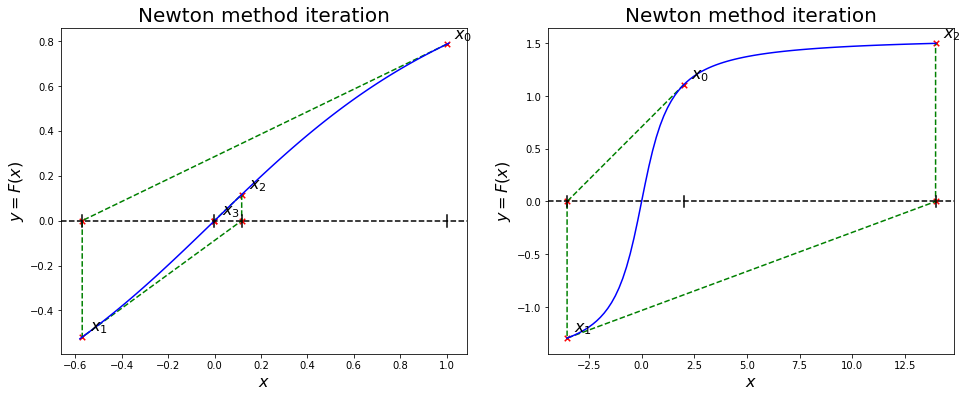

In [19]:
def newton_method(F, jac, x_0, atol = 1.e-5, maxiter=100):
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        Fx = F(x)
        y_n.append(Fx)
        # Chord update:
        x = x - Fx/jac(x)
        if abs(x - x_n[-1]) < atol:
            break
    
    return x_n, y_n


def F(x):
    return np.arctan(x)


def dFdx(x):
    return 1/(1+x**2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
x0 = 1.0
x_n, y_n = newton_method(F, dFdx, x0, atol=1.e-2, maxiter=4)
plot_iteration(ax1, x_n, y_n, F)
ax1.set_title("Newton method iteration", fontsize=20)

x0 = 2.0
x_n, y_n = newton_method(F, dFdx, x0, atol=1.e-2, maxiter=2)
plot_iteration(ax2, x_n, y_n, F)
ax2.set_title("Newton method iteration", fontsize=20);

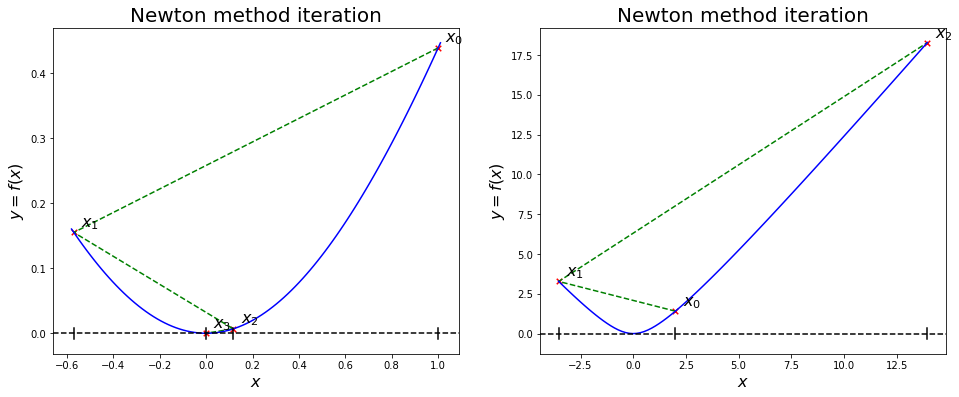

In [20]:
# plot the exact same Newton iteration along with the primitive of F
# i.e. df(x)/dx = F(x) - so that we treat it as a minimisation of f
def f(x):
    return x*np.arctan(x) - np.log(x**2 + 1)/2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
x0 = 1.0
x_n, y_n = newton_method(F, dFdx, x0, atol=1.e-2, maxiter=4)
f_n = [f(x) for x in x_n]
plot_iteration(ax1, x_n, f_n, f, include_chords=False)
ax1.set_ylabel('$y=f(x)$')
ax1.set_title("Newton method iteration", fontsize=20)

x0 = 2.0
x_n, y_n = newton_method(F, dFdx, x0, atol=1.e-2, maxiter=2)
f_n = [f(x) for x in x_n]
plot_iteration(ax2, x_n, f_n, f, include_chords=False)
ax2.set_ylabel('$y=f(x)$')
ax2.set_title("Newton method iteration", fontsize=20);

As it turns out, the line search method can be used to ensure convergence in areas where the Jacobian/Hessian is SPD. Thus we modify Newton's method to:


* evaluate $\vec F(\vec x^{(i)})$


* evaluate $\vec F'(\vec x^{(i)})$


* solve $\vec F'(\vec x^{(i)}) \vec p = -\vec F(\vec x^{(i)})$


* perform line search to find $\lambda^{(i)}$ with $\vec x^{(i+1)} = \vec x^{(i)} + \lambda^{(i)} \vec p$


It can be shown that if we are near enough to a root $F(\vec x^*)=0$ and the Hessian/Jacobian is SPD, the first attempt in the line search with $\lambda=1$ will be successful. This means that as we are getting closer to the solution, at some point we are again applying the original Newton's method and thus we should expect the same local quadratic convergence. Thus we have improved Newton's method considerably by combining its local convergence properties with global convergence properties, as long as we know that $f''$ is SPD everywhere.

In the pure Newton method without a line search the only pieces of information we need to provide are $\vec F(\vec x)$ and the $\vec F'(\vec x)$. Thus when we use it as an optimisation algorithm to find the minimum of $f$, by solving for $f'(\vec x)=\vec F(\vec x) =0$, we only need to provide $f'(\vec x)$ and the Hessian $f''(\vec x)$. With a line search however we do need provide the function $f$ itself to verify Armijo's rule. For root-finding problems that cannot be written as an optimisation problem (i.e. where there is no primitive function $f(\vec x)$ such that $f'(\vec x)=F(\vec x)$), we modify Armijo's rule to:

\begin{align}
   \| F(\vec x^{(i)} + \lambda \vec p^{(i)}) \|^2 - \| F(\vec x^{(i)}) \|^2
   &\leq \left.\alpha\lambda \frac{d\| F(\vec x^{(i)} + \lambda \vec p^{(i)}) \|^2}{d\lambda}\right|_{\lambda=0} \\
   &= 
   2\alpha\lambda  \left(F'(\vec x^{(i)}) F(\vec x^{(i)}\right)^T \vec p^{(i)} \\
   &= 2\alpha\lambda F(\vec x^{(i)})^T F'(\vec x^{(i)}) \vec p^{(i)} \\
   &= -2\alpha\lambda F(\vec x^{(i)})^T F(x) \\
   &= -2\alpha\lambda \|F(\vec x^{(i)})\|^2
\end{align}

in other words we demand sufficient reduction in the l2-norm as a percentage of the previous l2-norm of $F$. In this derivation we have used that we know that $F'(\vec x^{(i)}) \vec p^{(i)} = -F(\vec x^{(i)})$ for Newton's method.

Let's return to our example above where the original Newton method diverged for points that are not near the root $x=0$, and study the behaviour of Newton with line search where the line search simply halves lambda until the Armijo rule is satisfied. As expected, the method is now convergent for any starting point, and the reduction of $\lambda$ is only applied further away from the solution, thus maintaining quadratic convergence for points that are closer.

In [21]:
def simple_line_search(x, p, f, initial_slope, alpha=1e-4, max_search_iter=100):
    """Simple line search that halves lambda until the Armijo rule is satisfied
    
    x - initial point (at lambda=0)
    p - search direction, search is along x+lambda*p
    f - (callback) function to minimize
    initial_slope - derivative of f in x in p-direction"""
    lamda = 1.
    if initial_slope==0.0:
        return x, 1.0, 0
    for j in range(max_search_iter):
        xt = x + lamda*p
        # check Armijo rule:
        if f(xt) - f(x) <= alpha*lamda*initial_slope:
            break
        # uncomment to follow convergence of line search:
        # print(j,lamda,f(xt)-f(x), alpha*lamda*initial_slope)
        lamda /= 2.
    else:
        raise Exception("Line search did not converge")
    return xt, lamda, j


def newton_method_ls(F, jac, f, line_search, x_0, atol = 1.e-5, maxiter=100, verbose=False):
    "Newton method with line search"
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        Fx = F(x)
        y_n.append(Fx)
        # Newton update:
        if isinstance(Fx, float) or len(Fx)==1:
            p = -Fx/jac(x)
        else:
            p = sl.solve(jac(x), -Fx)
                
        x, lamda, reductions = line_search(x, p, f, np.dot(F(x), p))
        if verbose:
            print("In iteration {}, x={}; {} reductions were needed (lambda={})".format(i, x_n[-1], reductions, lamda))
        if sl.norm(x - x_n[-1]) < atol:
            break
    
    return x_n, y_n

In iteration 0, x=2.0; 1 reductions were needed (lambda=0.5)
In iteration 1, x=-0.767871794485226; 0 reductions were needed (lambda=1.0)
In iteration 2, x=0.27308165470162815; 0 reductions were needed (lambda=1.0)
In iteration 3, x=-0.013380179514898893; 0 reductions were needed (lambda=1.0)
In iteration 4, x=1.5969047477779746e-06; 0 reductions were needed (lambda=1.0)

In iteration 0, x=10.0; 3 reductions were needed (lambda=0.125)
In iteration 1, x=-8.57298688808465; 3 reductions were needed (lambda=0.125)
In iteration 2, x=4.972971445878592; 2 reductions were needed (lambda=0.25)
In iteration 3, x=-3.854859757676751; 2 reductions were needed (lambda=0.25)
In iteration 4, x=1.3669409069874696; 0 reductions were needed (lambda=1.0)
In iteration 5, x=-1.3271838200471255; 0 reductions were needed (lambda=1.0)
In iteration 6, x=1.227333477482352; 0 reductions were needed (lambda=1.0)
In iteration 7, x=-0.9960755661712488; 0 reductions were needed (lambda=1.0)
In iteration 8, x=0.5646516

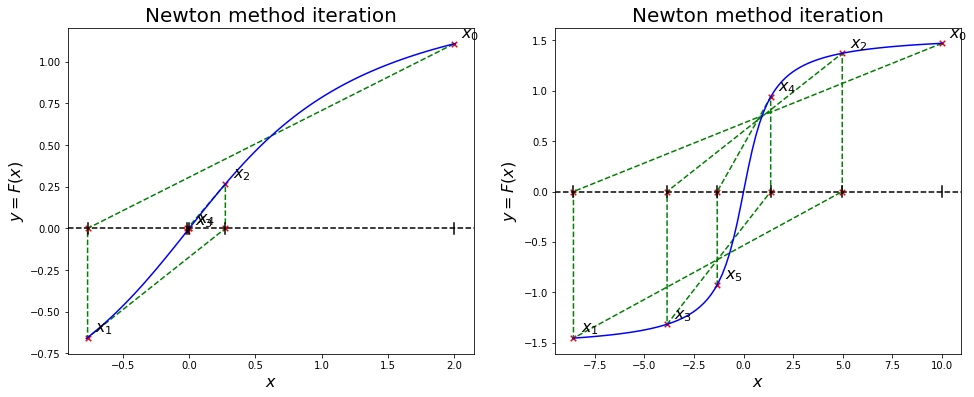

In [22]:
def f(x):
    return x*np.arctan(x) - np.log(x**2 + 1)/2


def F(x):
    return np.arctan(x)


def dFdx(x):
    return 1/(1+x**2)


fig, ax = plt.subplots(1, 2, figsize=(16,6))
x0 = 2.0
x_n, y_n = newton_method_ls(F, dFdx, f, simple_line_search, x0, atol=1.e-5, verbose=True)
plot_iteration(ax[0], x_n, y_n, F)
ax[0].set_title("Newton method iteration", fontsize=20)

print()
x0 = 10.0
x_n, y_n = newton_method_ls(F, dFdx, f, simple_line_search, x0, atol=1.e-5, verbose=True)
plot_iteration(ax[1], x_n[:6], y_n[:6], F)
ax[1].set_title("Newton method iteration", fontsize=20);

## Scale invariance

Let us now compare the performance of the steepest descent method with Newton's method. 

For optimisations of $f$ with steepest descent we have

$$
  \vec x^{(i+1)} = \vec x^{(i)} -\lambda^{(i)} F(\vec x^{(i)})
$$

where we now choose $\lambda^{(i)}$ via a line search method. We should notice that this is just the Chord method, which we have encountered in 1D with a fixed $\lambda=1/m$, which can be applied to more general root-finding problems $F(\vec x)=0$ as well. Having a function $f$ to measure sufficient decrease in the line search however does generally improve the line search.

Before we return to our sample problem, we introduce one change, an overall scaling of the function by a factor $C$:

\begin{align*}
  f(x) &= C \left(x \operatorname{atan}(x) - \log(x^2 + 1)/2\right), \\
  F(x) &= f'(x) = C \operatorname{atan}(x), \\
  F'(x) &= f''(x) = \frac C{1+x^2}.
\end{align*}

In [23]:
def steepest_descent_ls(F, f, line_search, x_0, atol = 1.e-5, maxiter=100, verbose=False):
    "Steepest decent method with line search"
    x_n = []
    y_n = []
    x = x_0
    
    # iterate until we hit break either as we hit tolerance or maximum number iterations
    # since we include the initial guess, the max. number of entries is maxiter+1
    for i in range(maxiter+1):
        x_n.append(x)
        Fx = F(x)
        y_n.append(Fx)
        # Chord update:
        p = -Fx
        x, lamda, reductions = line_search(x, p, f, F(x)*p)
        if verbose:
            print("In iteration {}, x={}; {} reductions were needed (lambda={})".format(i, x_n[-1], reductions, lamda))
        if sl.norm(x - x_n[-1]) < atol:
            break
    
    return x_n, y_n

C = 0.01, number of function evaluations: 202
C = 0.1, number of function evaluations: 202
C = 0.5, number of function evaluations: 108
C = 1.0, number of function evaluations: 22
C = 10.0, number of function evaluations: 180
C = 100.0, number of function evaluations: 704


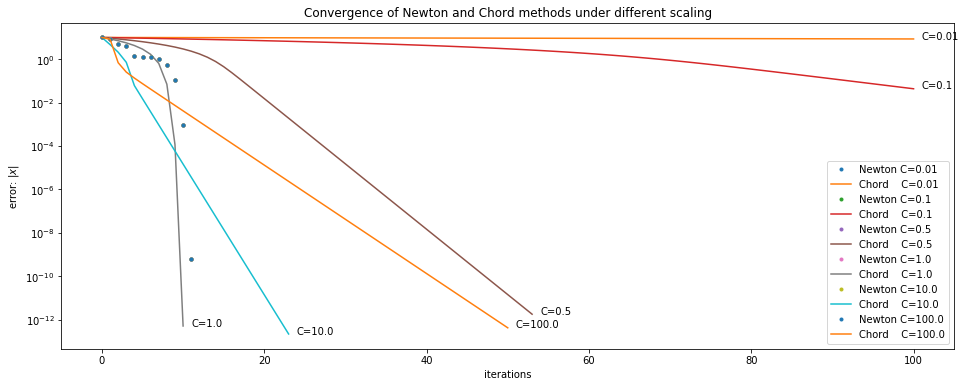

In [24]:
# NOTE: the three functions below depend on C which is set outside
counter = 0  # counts the number of f-evaluations
def f(x):
    # to change a value outside a function scope, it needs to be declared global:
    global counter  
    counter += 1
    return C*(x*np.arctan(x) - np.log(x**2 + 1)/2)


def F(x):
    return C*np.arctan(x)


def dFdx(x):
    return C/(1+x**2)


fig, ax = plt.subplots(1, 1, figsize=(16,6))
for C in [0.01, 0.1, 0.5, 1., 10., 100.]:
    x0 = 10.0
    x_n, y_n = newton_method_ls(F, dFdx, f, simple_line_search, x0, atol=1.e-12)
    ax.semilogy(np.abs(x_n), '.', label='Newton C={}'.format(C))
    
    # we compute the number of function evaluations in the steepest descent method
    # by registering the counted n/o evaluations before and after
    counter_before = counter
    x_n, y_n = steepest_descent_ls(F, f, simple_line_search, x0, atol=1.e-12)
    counter_after = counter
    print("C = {}, number of function evaluations: {}".format(C, counter_after-counter_before))
    ax.semilogy(np.abs(x_n), '-', label='Chord    C={}'.format(C))
    ax.annotate('C={}'.format(C), [len(x_n), np.abs(x_n[-1])])
    
ax.set_xlabel('iterations')
ax.set_ylabel('error: $\|x\|$')
ax.set_title('Convergence of Newton and Chord methods under different scaling')
ax.legend();

We observe that the convergence of Newton's method is completely independent of the chosen scale $C$. This can be explained by writing out the effect of multiplying $f$, $f'$ and $f''$ by $C$ on the algorithm (check this for yourself!). This is an important property for optimisation and root-finding algorithms. Although it is good advice to rescale the input and output parameters (i.e. scaling of $\vec x$ and $F(\vec x)$) in such a way that values of order 1 are expected - for instance by choosing sensible units or [non-dimensionalisation](https://en.wikipedia.org/wiki/Nondimensionalization) - in many practical applications it is hard to control the extent of feasible values.

The same cannot be said for the Chord method (Steepest Descent). For small values of $C$ the method struggles to reduce $f$ within the 100 maximum allowed iterations. This is because, unlike for the Newton method, the step-size is directly proportional to $C$, resulting in small steps when $C$ is small. For large values of $C$ it seems to do better in terms of iterations but when looking at the number of function evaluations that are required, we see that this goes up rapidly, making the method still very costly. This is because for large $C$ the initial step size in the line search at $\lambda=1$ is far too large, which means we need a large number of reductions to satisfy the Armijo rule. Only at $C=1$ do we see convergence that is comparable (even slightly better) than Newton. This should be seen as a coincidence: for $C=1$, $F'(x)\to 1$ when $x\to 0$, which means that the Chord method and Newton's method convergence to the same step size!

# Trust Region Methods
## Trust Region Methods - derivation (\*)
<div class="optional">
Remember that Newton's method is defined using a linearisation of $F$ around the current guess $\vec x^{(i)}$:

$$
  F(\vec x^{(i)} + \vec p) \approx F_{\text{linear}}(\vec x^{(i)}+\vec p) = F(\vec x^{(i)}) + F'(\vec x^{(i)}) \vec p
$$

where $\vec p=\vec x^{(i+1})-\vec x^{(i)}$ which we find by finding the root of this linearisation: $F_{\text{linear}}(\vec x^{(i)}+\vec p)=\vec 0$. If $F(\vec x)=f'(\vec x)$ (optimisations), an equivalent description is to say that we approximate $f$ by a quadratic:

$$
  f(\vec x^{(i)} + \vec p) \approx f_{\text{quadratic}}(\vec x^{(i)}+\vec p) = f(\vec x^{(i)}) + f'(\vec x^{(i)})^T \vec p + \tfrac 12\vec p^T f''(\vec x^{(i)}) \vec p
$$

and we find $p$ through minimisation of $f_{\text{quadratic}}$.

If $f$ is indeed close to quadratic then we expect Newton's method to be very accurate without the need for a line-search, i.e. $\lambda=1$. If the $\vec p$ obtained from Newton's original method however fails the test (Armijo rule) at $\lambda=1$ this indicates that $f$ is deviating too much from $f_{\text{quadratic}}$ and we should look for a new point closer to the previous one at $\vec x^{(i)}$.

Let's look at an example minimisation in 2D of

$$
  f(x, y) = \frac{\left(x^2 + (\gamma y)^2 -1\right)^2}{x^2 + (\gamma y)^2 - 1/h} - y,
$$

where $\gamma$ determines the aspect ratio, and $h$ the height of the "bump" at $\vec x=(0,0)$. We study the behaviour of Newton's method with an intial guess at $\vec x_0=(-.5, -.5)$. First let's plot the contours and a 3D surface plot.
</div>

In [25]:
from mpl_toolkits.mplot3d import Axes3D

gamma = 5  # aspect ratio
mx = 2.5  # width of axis view
x0 = np.array([-0.5,-0.5])  # initial guess
h = 10.  # height of bump

# here and below we ... (three dots) to leave free any unspecified dimensions
# so if x.shape=(D,):    x[...,0] = x[0]
#    if x.shape=(N,D):   x[...,0] = x[:,0]
#    if x.shape=(M,N,D): x[...,0] = x[:,:,0], etc.
# in this way the function f works regardless of whether we give it one point in R^D
# or a MxN raster of points
def f(x):
    return (x[...,0]**2 + (gamma*x[...,1])**2 - 1)**2/(x[...,0]**2 + (gamma*x[...,1])**2 + 1/h) - x[...,1]


def dfdx(xy):
    x = xy[...,0]
    y = xy[...,1]
    ans = np.empty_like(xy)
    ans[...,0] = -2*x*(gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 + 4*x*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h)
    ans[...,1] = -2*gamma**2*y*(gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 + 4*gamma**2*y*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h) - 1
    return ans


def hess(xy):
    x = xy[...,0]
    y = xy[...,1]
    ans = np.empty(xy.shape+(xy.shape[-1],))
    ans[...,0,0] = 2*(2*gamma**2*y**2 + 4*x**2*(gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 - 8*x**2*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h) + 6*x**2 - (gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h) - 2)/(gamma**2*y**2 + x**2 + 1/h)
    ans[...,0,1] = 8*gamma**2*x*y*((gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 - 2*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h) + 1)/(gamma**2*y**2 + x**2 + 1/h)
    ans[...,1,0] = ans[...,0,1]
    ans[...,1,1] = 2*gamma**2*(4*gamma**2*y**2*(gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h)**2 - 8*gamma**2*y**2*(gamma**2*y**2 + x**2 - 1)/(gamma**2*y**2 + x**2 + 1/h) + 6*gamma**2*y**2 + 2*x**2 - (gamma**2*y**2 + x**2 - 1)**2/(gamma**2*y**2 + x**2 + 1/h) - 2)/(gamma**2*y**2 + x**2 + 1/h)
    return ans

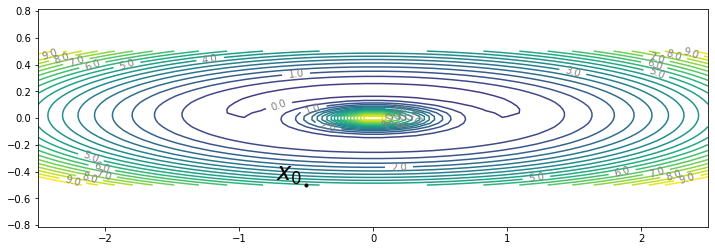

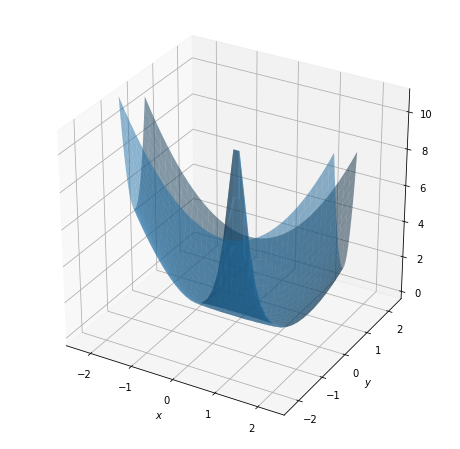

In [26]:
x = np.linspace(-mx, mx, 40)
y = np.linspace(-mx/gamma, mx/gamma, 40)
# xy are the locations of the horizontal grid, it is a Nx x Ny x 2 array
xy = np.array(np.meshgrid(x, y)).T
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 1, 1)
cvalues = np.arange(-2,10,.5)
c = ax.contour(xy[...,0], xy[...,1], f(xy), cvalues)
ax.clabel(c, np.arange(0,10,1), fmt='%1.1f', colors='grey')
axes=ax.axis('equal')
ax.plot(x0[0],x0[1],'k.')
ax.annotate('$x_0$', xy=x0, fontsize=24, 
            xytext=(-30, 4), textcoords='offset points')
ax.axis(axes)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(xy[...,0], xy[...,1], f(xy), alpha=0.5)
ax.set_xbound([-mx, mx])
ax.set_ybound([-mx, mx])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

<div class="optional">
We see the bump in the origin, which we can check has a height of $h$. For large $\vec x$, $f\approx x^2+\gamma^2 y^2 -y$ which has the shape of a convex quadratic function, stretched in the $x$-direction, that we have seen before. The minimum is found in the ring around the central bump where the function transitions from the bump to the quadratic. The $-y$ term causes a slight tilt in the surface, which means there is a unique minimum above the origin.

In the next plot, we show the same contours of $f$ as above but now in grey. On top we plot the contours of the quadratic model $f_{\text{quadratic}}$ around $x^{(0)}$ so that we can see the difference between the two. In addition, we plot $\vec x^{(1)}$ the position at the end of the first Newton step, which takes us to the minimum of the quadratic model.
</div>

New position x1: [-0.05258477 -0.03201334]
Achieved decrease: 2.3017328804325805
Expected (Armijo): -12.277649434871229


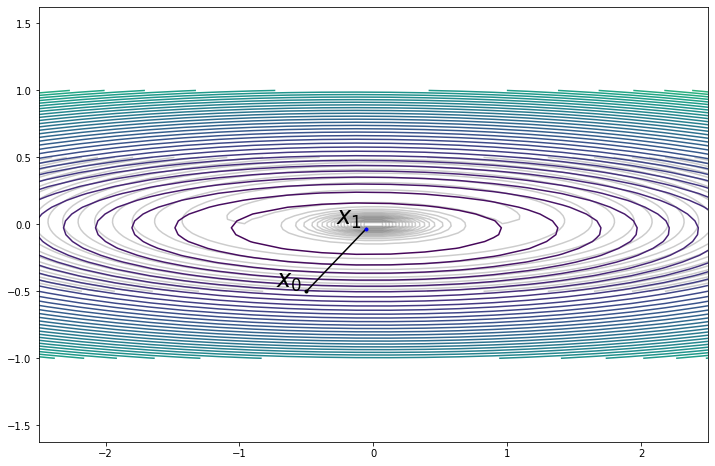

In [27]:
# initial guess x0 is chosen in cell above
fx0 = f(x0)
dfdx0 = dfdx(x0)
hessx0 = hess(x0)

# standard Newton step:
x1 = x0 - sl.solve(hessx0, dfdx0)

# quadratic model around x0
def quadratic_model(x):
    p = x-x0
    return fx0 + np.dot(p,dfdx0) + np.sum(
        np.tensordot(p, hessx0, axes=(-1,0))*p, axis=-1)/2



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
c = ax.contour(xy[...,0], xy[...,1], f(xy), cvalues, colors='k', alpha=0.2)
ax.plot(x0[0],x0[1],'k.')
ax.annotate('$x_0$', xy=x0, fontsize=24, 
            xytext=(-30, 4), textcoords='offset points')
axes = ax.axis('equal')
minx = np.min([x0, x1, [-mx, -mx/gamma]], axis=0)
maxx = np.max([x0, x1, [mx, mx/gamma]], axis=0)
pad = (maxx-minx)*0.5
x01 = np.linspace(minx[0]-pad[0], maxx[0]+pad[0], 40)
y01 = np.linspace(minx[1]-pad[1], maxx[1]+pad[1], 40)
xy01 = np.array(np.meshgrid(x01, y01)).T
z = quadratic_model(xy01)
c = ax.contour(xy01[...,0], xy01[...,1], z, np.arange(z.min(), z.max(), 1))
ax.plot([x0[0],x1[0]],[x0[1],x1[1]],'k')
ax.plot(x1[0],x1[1],'b.')
ax.annotate('$x_1$', xy=x1, fontsize=24,
            xytext=(-30, 4), textcoords='offset points')

ax.axis(axes);

print("New position x1:", x1)
print("Achieved decrease:", f(x1)-f(x0))
print("Expected (Armijo):", np.dot(dfdx0, x1-x0))

<div class="optional">
If we look at the position $\vec x_1$ after a full Newton step, we find it to be close to the origin. This is because close to $\vec x_0$ the function $f$ looks a lot like a convex quadratic, but as we get further away from $\vec x_0$, the differences between the quadratic model $f_{\text{quadratic}}$ become larger and larger. In this particular case we have actually landed ourselves on top of the central bump, so that instead of a decrease in $f$ we have actually obtained an increase!

In a line search we would backtrack along the line segment between $\vec x_0$ and $\vec x_1$ to a point closer to $\vec x_0$ where we trust the quadratic model more. If we have decided we can trust the quadratic model only in the vicinity of $\vec x_0$ however, it seems not entirely obvious that we should still trust the search direction $\vec x_1-\vec x_0$. The idea behind <a class="definition" href="#definitions" id="trustregionmethods">trust region methods</a> is that once we have decided that $\vec x_1$ is too far from $\vec x_0$ (based on the usual sufficient decrease heuristics), we decide to only trust the quadratic model in a *trust region* closer to $\vec x_0$. For instance we could decide to only trust the quadratic model at a distance $\delta = \|\vec x_1 -\vec x_0\|/2$ halfway to the full Newton step $x_1$. In other words, we define a trust region

$$
  B(\vec x_0, \delta) = \left\{\vec x \mid \|\vec x - \vec x_0\| \leq \delta \right\}
$$

and only use $f_{\text{quadratic}}$ within that region. The new point according to the trust region method is then given by the minimizer of $f_{\text{quadratic}}$ in $B(\vec x_0, \delta)$.

This leads to a constrained minimisation problem (which we'll cover in lecture 6), but from the following figure, we can see:
</div>

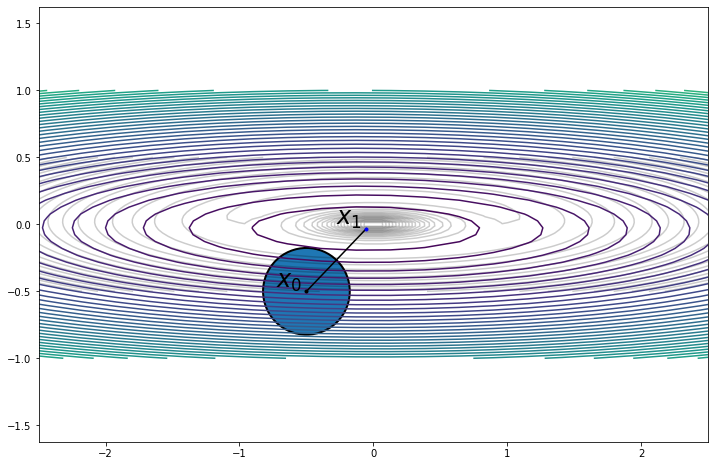

In [28]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
c = ax.contour(xy[...,0], xy[...,1], f(xy), cvalues, colors='k', alpha=0.2)
ax.plot(x0[0],x0[1],'k.')
ax.annotate('$x_0$', xy=x0, fontsize=24, 
            xytext=(-30, 4), textcoords='offset points')

axes = ax.axis('equal')
minx = np.min([x0, x1, [-mx, -mx/gamma]], axis=0)
maxx = np.max([x0, x1, [mx, mx/gamma]], axis=0)
pad = (maxx-minx)*0.5
x01 = np.linspace(minx[0]-pad[0], maxx[0]+pad[0], 40)
y01 = np.linspace(minx[1]-pad[1], maxx[1]+pad[1], 40)
xy01 = np.array(np.meshgrid(x01, y01)).T
z = quadratic_model(xy01)
# tweak contour values s.t. we get a contour going exactly through the new TR point
qcvalues = np.arange(z.min(), z.max(), 1) - 0.291527127251201
c = ax.contour(xy01[...,0], xy01[...,1], z, qcvalues)

ax.plot([x0[0],x1[0]],[x0[1],x1[1]],'k')
ax.plot(x1[0],x1[1],'b.')
ax.annotate('$x_1$', xy=x1, fontsize=24,
            xytext=(-30, 4), textcoords='offset points')

delta = sl.norm(x1-x0)/2.
trust_region = plt.Circle(x0, delta, edgecolor='k', linewidth=2)
ax.add_artist(trust_region)
ax.axis(axes);

<div class="optional">
$\newcommand\xtr{\vec x_{TR}^1}$

The point $\xtr\in B(\vec x_0, \delta)$ where the minimum is achieved is where its outer circle touches a contour of $f_{\text{quadratic}}$. The normal to the circle in that point, which is in the direction $\xtr-\vec x_0$, should be in the same direction as the negative gradient of $f_{\text{quadratic}}$ at that point:

$$
  \mu\left[\xtr - \vec x_0\right] = -f_{\text{quadratic}}'(\xtr)
$$

where $\mu$ is a positive scalar. Using

$$
  f_{\text{quadratic}}'(\vec x) = f'(\vec x_0) + f''(\vec x_0)\left[\vec x-\vec x_0\right],
$$

we can rewrite

$$
  \left[\mu\mat I + f''(\vec x_0)\right] \left[\xtr - \vec x_0\right] = - f'(\vec x_0) \label{trust_region} \tag{trust_region}
$$

which is a matrix equation where the matrix is formed by the sum of two parts: $\mu$ times the identity matrix, and the Hessian.
</div>

mu = 0.5, \|x_TR - x_0\| = 0.5851985134095151
mu = 1, \|x_TR - x_0\| = 0.5472878617146656
mu = 2, \|x_TR - x_0\| = 0.5036006076828866
mu = 5, \|x_TR - x_0\| = 0.44772733194102315
mu = 10, \|x_TR - x_0\| = 0.40286967530606366
mu = 25, \|x_TR - x_0\| = 0.3225051626217935
-0.291527127251201
mu = 50, \|x_TR - x_0\| = 0.24423063378115478
mu = 100, \|x_TR - x_0\| = 0.16470280367656442
mu = 200, \|x_TR - x_0\| = 0.09978570972879391


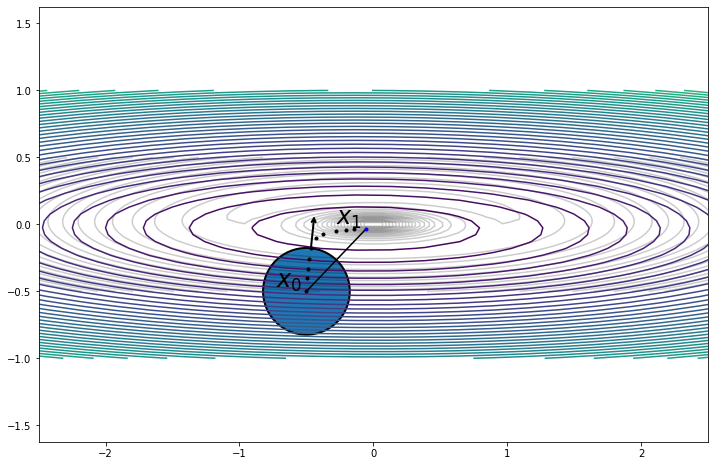

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
c = ax.contour(xy[...,0], xy[...,1], f(xy), cvalues, colors='k', alpha=0.2)
ax.plot(x0[0],x0[1],'k.')
ax.annotate('$x_0$', xy=x0, fontsize=24, 
            xytext=(-30, 4), textcoords='offset points')

axes = ax.axis('equal')
minx = np.min([x0, x1, [-mx, -mx/gamma]], axis=0)
maxx = np.max([x0, x1, [mx, mx/gamma]], axis=0)
pad = (maxx-minx)*0.5
x01 = np.linspace(minx[0]-pad[0], maxx[0]+pad[0], 40)
y01 = np.linspace(minx[1]-pad[1], maxx[1]+pad[1], 40)
xy01 = np.array(np.meshgrid(x01, y01)).T
z = quadratic_model(xy01)
# tweak contour values s.t. we get a contour going exactly through the new TR point
qcvalues = np.arange(z.min(), z.max(), 1) - 0.291527127251201
c = ax.contour(xy01[...,0], xy01[...,1], z, qcvalues)
ax.plot([x0[0],x1[0]],[x0[1],x1[1]],'k')
ax.plot(x1[0],x1[1],'b.')
ax.annotate('$x_1$', xy=x1, fontsize=24,
            xytext=(-30, 4), textcoords='offset points')

delta = sl.norm(x1-x0)/2.
trust_region = plt.Circle(x0, delta, edgecolor='k', linewidth=2)
ax.add_artist(trust_region)
ax.axis(axes)

# we're not actually implementing a trust region method, we're simply
# evaluating the (trust_region) equation for various values of mu in [0,\infty]

mus = [.5, 1, 2, 5, 10, 25, 50, 100, 200]
for mu in mus:
    s = sl.solve(mu*np.eye(2,2) + hessx0, -dfdx0)
    xtr = x0 + s
    r = sl.norm(s)
    print("mu = {}, \|x_TR - x_0\| = {}".format(mu, r))
    ax.plot(xtr[0], xtr[1], 'k.')
    if abs(r-delta)<0.01:
        ax.annotate("", xtr + s*0.8, xytext=xtr, arrowprops={'arrowstyle':'->', 'linewidth': 2})
        print(quadratic_model(xtr))

## Trust Region Methods - summary
Trust region methods limit the area in which the quadratic approximation of $f$ that underlies Newton's method is trusted 
based on a sufficient decrease criterion. It will apply Newton's method unaltered if the quadratic model is good. This will be the case if we're close enough to a local minimum, thus giving us the same local convergence as Newton's method and Newton's method with line search. If we are far away from the minimum, the quadratic model may only be accurate in the near vicinity of the current guess. In this case, rather than jumping to the minimum of the quadratic approximation, we jump to the minimum of the quadratic approximation within the trusted region. As we have shown above, this is equivalent to modifying the Hessian matrix that is used to solve for the step vector $\vec p = \xtr -\vec x_0$
(here $\vec x_0$ is the last iterate and $\xtr$ is the next iterate computed by the trust region method)
in the following way:

$$
  f''(\vec x_0) \to f''(\vec x_0) + \mu\mat I
$$

We consider the following two limits for $\mu$:

* for small $\mu$ (limit $\mu\to 0$) we can neglect the $\mu\mat I$ part and we recover the original Newton method


* for large $\mu$ (limit $\mu\to\infty$) we can neglect the Hessian, and obtain

$$
  \xtr = \vec x_0 - \mu^{-1} f'(\vec x_0)
$$

which is just the Steepest Descent with $\lambda=\mu^{-1}$.

In this way, trust region methods can backtrack by increasing $\mu$ (which limits the size of the trusted region) from $\mu=0$, in a similar way to line search methods that decrease $\lambda$ starting at $\lambda=1$. The line search method however will just shorten the step in the chosen Newton direction, whereas the trust region method also changes direction to slowly become more like a Steepest Descent method.

This difference will be most notable in regions where the Hessian $f''$ is not SPD. As we noted before, if $f''$ is not SPD the Newton direction is not necessarily a descent direction and it is therefore not guaranteed that a backtracking line search method will actually converge to an acceptable new point. The Steepest Descent method actually completely ignores the Hessian so is generally well-behaved. One can therefore interpret the Newton trust region method as a modification to the Hessian (by the addition of $\mu\mat I$) to ensure that the modified Hessian is SPD.

To actually compute the specific $\mu$ that corresponds to a specific size of the trust region, so that $\|\xtr-\vec x_0\|=\delta$, is not entirely straight-forward and can be costly. There are therefore several approaches and approximations (Dogleg, Hook, Powell's method) to find a suitable $\mu$, which we'll not go into here.

# Quasi-Newton Methods

In <a class="definition" href="#definitions" id="QuasiNewtonmethods">Quasi-Newton methods</a> rather than using the exact Hessian $f''$ (or Jacobian $\vec F'$), an approximation $\mat B$ is used. A reason, that we have already seen, to modify the Hessian (and thus modify the exact Newton method) is to improve the *global convergence* properties. As long as we ensure that our approximation converges to the Hessian (a little more detail can be found in the following (optional) section about the Dennis-Moré theorem) we still have *local convergence* properties that are similar to those of pure Newton. Line search and trust region methods are thus techniques that apply this principle.

Another important reason to consider replacing the exact Jacobian $\vec F'(\vec x^{(i)})$ (or Hessian $f''(\vec x)$ in optimisation problems) with an approximation, is that the calculation of the exact Jacobian can be very costly. After all we like to consider inversion and optimisation problems with a large number, $n$, of unknowns, so the Hessian becomes a large $n\times n$ matrix. Moreover, for a lot of applications $\vec F$ is not given by a simple analytical formula, and therefore no analytical derivative is available. Consider the common case where $F$ is formed by feeding $\vec x$ as input parameters to an expensive numerical model, and $\vec F(\vec x)$ are the outcomes of that model. It is not immediately obvious how one should compute the derivative of the model outcomes with respect to the input parameters. A straightforward idea is to simply perturb the input parameters one-by-one, and for each direction $\vec p$ approximate the derivate by

$$
  \vec F'(\vec x)^T\vec p \approx \frac{\vec F(\vec x+\epsilon\vec p)-\vec F(\vec x)}{\epsilon\|p\|}
  \;\;\; \text{ for small } \; \epsilon
$$

This however would require $n$ different expensive model runs, one for each of the different directions. In lecture 7 we will discuss more efficient ways of computing gradients  with respect to numerical model inputs, but it should be clear that computing the exact Hessian is not feasible in all applications.

In the rest of this lecture we will therefore look at methods of the following form:


* evaluate $\vec F(\vec x^{(i)})$


* construct $\mat B^{(i)}$, an approximation to the Jacobian $F'(\vec x^{(i)})$


* solve $\mat B^{(i)}\vec p = -\vec F(\vec x^{(i)})$


* update $\vec x^{(i+1)} = \vec x^{(i)} + \vec p$



We will discuss the Gauss-Newton and Quasi-Newton secant methods (lecture 4) that fall in this category. We will also encounter Inexact Newton in lecture 5, in which we do assemble the full Hessian but only approximately solve the associated linear inversion problem.

## The Dennis-Moré Theorem (*)

<div class="optional">
An important result for quasi-Newton methods is the Dennis-Moré theorem:

Assume $f$ is twice differentiable and $f''$ is Lipschitz continuous. Let $\mat B^{(k)}$ be a series of bounded ($\|\mat B^{(i)}\|\lt M$ for some $M$) and non-singular matrices, and consider the iterative method:

$$
  \vec x^{(i+1)} = \vec x^{(i)} - {\mat B^{(i)}}^{-1} f'(\vec x^{(i)})
$$

Suppose $\vec x^{(i)}$ converges to a stationary point $\vec x^*$ in which $f''(\vec x^*)$ is SPD (which in particular means it's a minimum). Then $\vec x^{(i)}$ converges super-linearly to $\vec x^*$ if and only if

$$
  \lim_{i\to\infty} \frac{\left\|\mat E^{(i)}\left[\vec x^{(i+1)}-\vec x^{(i)}\right]\right\|}{\left\|\vec x^{(i+1)}-\vec x^{(i)}\right\|} = 0,
  \label{Dennis-Moré} \tag{Dennis-Moré}
$$

where $\mat E^{(i)}=\mat B^{(i)} - f''(\vec x^*)$.

Here the matrix $\mat E^{(i)}$ represents the error in the Hessian as we converge to $\vec x^*$, but note that we only demand convergence of this error for the Hessian applied in the direction of convergence.
</div>

# Newton-Gauss

A large class of inversion/optimisation problems take the form of a nonlinear least-squares problem. These are problems based on a residual function $\vec R:\R^n \to \R^m$ where we want to find the $\vec x\in\R^n$ that minimizes the 2-norm of the residual $\vec R(\vec x)$. 


For convenience we study the equivalent minimisation problem

$$
  \min_{\vec x} f(x), \;\;\; \text{ where } \; f(x) = \tfrac 12 \vec R(\vec x)^T \vec R(\vec x)
$$

Here the $m$ entries of $\vec R(\vec x)$ typically represent some constraints that we may not be able to (or expect to) satisfy exactly. We distinguish the following cases:


* if $m\lt n$ we call the problem *underdetermined* (also underconstrained). Here we can typically find many solutions that satisfy $\vec R(\vec x)=0$ exactly, and these solutions may form higher-dimensional subsets of $\R^n$. Since they are also solutions to the minimimisation problem, one finds that applying Newton's method directly is problematic.


* if $m=n$, the *square* (*equidetermined*) case, we could also apply Newton's method to $\vec R(\vec x)=0$ directly.


* if $m>n$ the problem is overdetermined. Typically there are no exact solutions to $\vec R(\vec x)=0$. As we will see the magnitude of the residual in the minimum of $f$, $\|\vec R(\vec x^*)\|$ plays a role in the convergence properties of the Gauss-Newton method.


In order to apply Newton's method to the minimisation of $f$, we first derive:

$$
  f'(\vec x) = \vec R'(\vec x)^T\vec R(\vec x) \\[5pt]
  f''(\vec x) = \vec R'(\vec x)^T \vec R'(\vec x) + \sum_{k=1}^m R_k(\vec x) R_k''(\vec x)
$$

The second term in the calculation of the Hessian $f''$ involves a sum over all $m$ components $R_k$ of the residual vector $\vec R$, and for each of these components we need to calculate the $n\times n$ Hessian $R_k''$. The assembly of the full Hessian needed for Newton's method therefore quickly becomes unfeasible for larger problems. The <a class="definition" href="#definitions" id="GaussNewtonmethod">Gauss-Newton method</a> therefore approximates the Hessian by leaving out the second term. The method is then given by:


* evaluate $\vec f'(\vec x^{(i)}) = \vec R'(\vec x^{(i)})^T \vec R(\vec x^{(i)})$


* evaluate $\mat B^{(i)} = \vec R'(\vec x^{(i)})^T \vec R'(\vec x^{(i)})$


* solve $\mat B^{(i)}\vec p = -\vec f'(\vec x^{(i)})$


* update $\vec x^{(i+1)} = \vec x^{(i)} + \vec p$



## Nonlinear regression

The most well-known case in this class of problems stems from nonlinear regression. Here, we want to build a model (fit a curve) $G$ that depends on $n$ model parameters $x_i$ such that for a set of $m$ measurements $(X_j,  Y_j)$ we have that

$$
  Y_i \sim G(X_i, \vec x)
$$

A least-squares fit of the model parameters $\vec x$ to the given data $(X_j, Y_j)$ is given by

$$
  \min_{\vec x} \|\vec R(\vec x)\|^2, \;\;\; \text{ where } \;
  R(\vec x)_j = G(X_j, \vec x) - Y_j, 1\leq j\leq m
$$

### The Linear Case: Linear Regression <a class="tocSkip"></a>
If the model $G$ is simply a linear combination of some chosen interpolant functions $\phi_j$, i.e.

$$
  G(X_i, \vec x) = \sum_j x_j \vec\phi_j(X_i)
$$

then $G$ and $\vec R$ are linear in $\vec x$ (note that the interpolant functions $\phi_j$ can still be non-linear) and we can write using a matrix $\mat G$

$$
  G(X_i, \vec x) = \mat G \vec x \;\;\; \text{ and }\;\;\; \vec R(\vec x) = \mat G\vec x - \vec Y
$$

where $\mat G$ is the $m\times n$ matrix:

$$
 \mat G = \begin{pmatrix}
 \phi_1(X_1) & \phi_2(X_1) & \dots & \phi_n(X_1) \\
 \phi_1(X_2) & \phi_2(X_2) & \dots & \phi_n(X_2) \\
 \vdots & \vdots & \ddots & \vdots \\
 \phi_1(X_m) & \phi_2(X_m) & \dots & \phi_n(X_2)
 \end{pmatrix}
$$

It should be noted that with *linear regression*, $\vec R''(\vec x)=\vec 0$, so there is no difference between Gauss-Newton and full Newton. Moreover, the function $f$

$$
  f(\vec x) = \tfrac 12 \vec x^T \mat G^T\mat G\vec x - \vec Y^T\mat G\vec x + \tfrac 12\vec Y^T\vec Y
$$

takes the same quadratic form as we saw in lecture 2

$$
  f(\vec x) = \tfrac 12 \vec x^T\mat A\vec x - \vec b^T\vec x + c,
$$

with $\mat A=\mat G^T\mat G, \vec b=\mat G^T\vec Y, c=\tfrac 12\vec Y^T\vec Y$ and the unknown model parameters $\vec x$. And so when we apply Newton to minimize this quadratic function, we are really just solving a linear system $\mat A\vec x=\vec b$. The solution therefore
is exactly the one we saw in lecture 1 (where we used the vectors $\vec m$ and $\vec d$ instead of $\vec x$, and $\vec Y$):

$$
  \vec x = \mat A^{-1}\vec b = \left(\mat G^T\mat G\right)^{-1} \mat G^T\vec Y
$$

### Nonlinear Example: Exponential Population Growth <a class="tocSkip/"></a>
For nonlinear regression however, when the model depends nonlinearly on the model parameters $\vec x$, Gauss-Newton is a useful technique. Combined with a trust region method this method is also referred to as <a class="definition" href="#definitions" id="LevenbergMarquard">Levenberg-Marquard</a> (for more details see the optional section 6.2).

As a simple example, let's consider the population of the United Kingdom since 1700.

In [30]:
# UK:
years = np.array([
    1700, 1730, 1750, 1790, 1800, 1810, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 
    1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839,
    1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
    1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865,
    1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878,
    1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891,
    1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
    1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
    1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
    1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
    1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
    1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
    1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
    1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
    1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
    2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
])

In [31]:
population = np.array([
    7200607, 7547572, 8221188, 10955459, 12327466, 13983890, 16186397, 16427955,
    16661282, 16897898, 17139513, 17381418, 17629610, 17858803, 18093284, 18329053,
    18569823, 18811881, 19028016, 19246151, 19468285, 19691420, 19918844, 20136267,
    20354979, 20578690, 20804402, 21027114, 21284460, 21504941, 21751903, 21994095,
    22231076, 22279863, 22246880, 22266109, 22287069, 22310067, 22567009, 22837200,
    23117738, 23417123, 23728007, 23974430, 24230353, 24488987, 24746160, 25009641,
    25291179, 25561448, 25828236, 26107967, 26385197, 26667813, 26955755, 27249851,
    27544197, 27844139, 28050928, 28385947, 28730581, 29082812, 29444523, 29814831,
    30173677, 30557062, 30920888, 31273446, 31576465, 31875253, 32184118, 32500733,
    32822214, 33142079, 33464925, 33793233, 34127982, 34472021, 34836751, 35211963,
    35593770, 35976405, 36367212, 36763751, 37166289, 37569674, 37975154, 38373808,
    38737346, 39102443, 39474558, 39850962, 40231673, 40614789, 41003923, 41398500,
    41795923, 42150769, 42318019, 42556673, 42965211, 43296057, 43473615, 43573615,
    43529634, 43437404, 43718000, 44072000, 44372000, 44596000, 44915000, 45059000,
    45232000, 45389000, 45578000, 45672000, 45866000, 46074000, 46335000, 46520000,
    46666000, 46868000, 47081000, 47289000, 47494000, 47991000, 48226000, 48216000,
    48400000, 48789000, 49016000, 49182000, 49217000, 49519000, 50014000, 50312000,
    50616016, 50621416, 50686056, 50797272, 50945400, 51123708, 51328660, 51559672,
    51818620, 52108972, 52433156, 52789816, 53171324, 53562804, 53945020, 54303104,
    54630988, 54928528, 55194456, 55429644, 55634932, 55809752, 55953320, 56066828,
    56152180, 56211944, 56247408, 56262020, 56263660, 56262128, 56265476, 56276316,
    56296240, 56330880, 56386228, 56466132, 56574280, 56709208, 56862896, 57023748,
    57183332, 57339444, 57494540, 57650472, 57810768, 57978320, 58156748, 58346672,
    58544936, 58746728, 58950848, 59149344, 59348952, 59580224, 59884128, 60286752,
    60802800, 61414660, 62076224, 62722604, 63306844, 63811884, 64250328, 64641108,
    65015688, 65397080, 65788574,
])

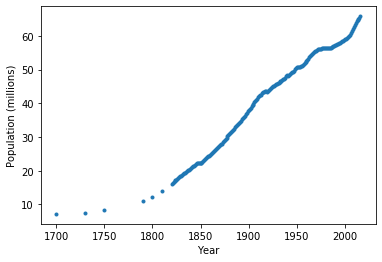

In [32]:
plt.plot(years, population/1e6, '.');
plt.xlabel('Year')
plt.ylabel('Population (millions)');

A common model for population growth, is to assume that the growth is exponential:
$$
  G(X) = C_1 \exp(C_2 X)
$$
where $C_1$ and $C_2$ are two parameters to be determined, which we'll denote as a vector $\vec x=(C_1, C_2)$. Following the notation above we have a number of data points $X_i, Y_i$ where $X_i$ are the times (in years) and $Y_i$ the known population in those years. The residual vector then takes the form
$$
  \vec R(\vec x) = \begin{pmatrix}
    G(X_1) - Y_1 \\
    G(X_2) - Y_2 \\
    \vdots \\
    G(X_m) - Y_m \\
   \end{pmatrix} = \begin{pmatrix}
    C_1 \exp(C_2 X_1) - Y_1 \\
    C_1 \exp(C_2 X_2) - Y_2 \\
    \vdots \\
    C_1 \exp(C_2 X_m) - Y_m \\
   \end{pmatrix}   
$$
    
which has a derivative

$$
  \vec R'(\vec x) = \begin{pmatrix}
    \exp(C_2 X_1) & C_1 X_1 \exp(C_2 X_1) \\
    \exp(C_2 X_2) & C_1 X_2 \exp(C_2 X_2) \\
    \vdots & \vdots  \\
    \exp(C_2 X_m) & C_1 X_m \exp(C_2 X_m) \\
   \end{pmatrix}   
$$








Its second derivative is a 2x2 matrix for each of the $m$ data points:

$$
\vec R''(\vec x) = 
\begin{pmatrix}
\begin{pmatrix}
  0 & X_1\exp(C_2 X_1) \\
  X_1\exp(C_2 X_1) & C_1 X_1^2 \exp(C_2 X_1)
\end{pmatrix} \\
\begin{pmatrix}
  0 & X_2\exp(C_2 X_2) \\
  X_2\exp(C_2 X_2) & C_1 X_2^2 \exp(C_2 X_2)
\end{pmatrix} \\
\vdots \\
\begin{pmatrix}
  0 & X_m\exp(C_2 X_m) \\
  X_m\exp(C_2 X_m) & C_1 X_m^2 \exp(C_2 X_m)
\end{pmatrix}
\end{pmatrix}
$$

In code:

In [33]:
# use data defined in previous cell (rescaled)
X = (years-years[0])/(years[-1]-years[0])
Y = population/population[0]

def R(x):  # the residual function
    C1, C2 = x
    return C1*np.exp(C2*X) - Y

def dRdx(x):  # the first derivative of the residual
    C1, C2 = x
    # [:, np.newaxis] turns a flat rank-1 array of lenght m into a mx1 column array
    # with np.hstack we can stack those horizontally
    return np.hstack((np.exp(C2*X)[:,np.newaxis], (C1*X*np.exp(C2*X))[:,np.newaxis]))

def dRdx2(x):  # the second derivative of the residual
    C1, C2 = x
    m = len(X)
    # first we collect the 2x2=4 entries for each of the m data points
    # into a m x 4 array
    ans = np.hstack((
         np.zeros((m,1)),
         (X*np.exp(C2*X))[:,np.newaxis],
         (X*np.exp(C2*X))[:,np.newaxis],
         (C1*X**2*np.exp(C2*X))[:,np.newaxis]
    ))
    # then we reshape it to m x 2 x 2
    return ans.reshape((m, 2, 2))

Note that in this case where we only have $n=2$ model parameters, it is still feasible to compute the second derivative $R''$ of the residual, a $m\times n\times n$ array. For models that involve many more parameters (large $n$), this quickly becomes unfeasible. Let us therefore check whether we can get away with the Gauss-Newton approximation to the Hessian, which does not require a second derivative of the residual.

Newton method
Succesful: True
Values for C1, C2: [1.47470894 1.88046128]
Number of iterations: 15
Number of function, Jacobian and Hessian evaluations: 16, 14, 13

Gauss-Newton method
Succesful: True
Values for C1, C2: [1.47470904 1.88046119]
Number of iterations: 14
Number of function, Jacobian and Hessian evaluations: 15, 14, 13



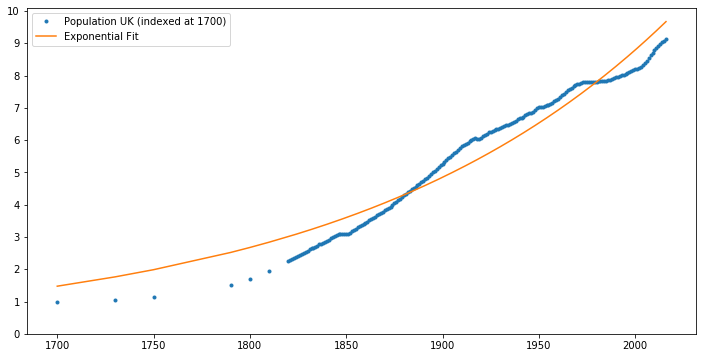

In [34]:
def f(x):  # the least squares fit that we're trying to minimize
    return 0.5 * np.sum(R(x)**2)


def F(x):  # this is the 1st derivative of f: F(x) = f'(x)
    return np.dot(R(x), dRdx(x))


def full_hessian(x):  # 2nd derivative (Hessian) of f
    Rprime = dRdx(x)
    return np.tensordot(Rprime, Rprime, axes=(0,0)) + np.tensordot(
            R(x), dRdx2(x), axes=(0,0))


def gn_hessian(x):  # approximation to the Hessian according to the Gauss-Newton method
    Rprime = dRdx(x)
    return np.tensordot(Rprime, Rprime, axes=(0,0))


x0 = [0, 0]
result = sop.minimize(f, x0, jac=F, hess=full_hessian, method='trust-ncg')
print("Newton method")
print("""Succesful: {success}
Values for C1, C2: {x}
Number of iterations: {nit}
Number of function, Jacobian and Hessian evaluations: {nfev}, {njev}, {nhev}
""".format(**result))

result = sop.minimize(f, x0, jac=F, hess=gn_hessian, method='trust-ncg')
print("Gauss-Newton method")
print("""Succesful: {success}
Values for C1, C2: {x}
Number of iterations: {nit}
Number of function, Jacobian and Hessian evaluations: {nfev}, {njev}, {nhev}
""".format(**result))

plt.figure(figsize=(12,6))
plt.plot(years, Y, '.', label='Population UK (indexed at 1700)')
C1, C2 = result['x']
plt.plot(years, C1*np.exp(C2*X), label='Exponential Fit')
plt.yticks(np.arange(11))
plt.legend();

In the results we see that approximating the Hessian in the Gauss-Newton way still leads to convergence in a reasonable number of iterations. For both cases we have here used a trust-region method, as neither the Hessian nor the approximate Gauss-Newton Hessian are guaranteed SPD, as we can see by computing the eigenvalues:

In [35]:
# compute eigenvalues of the full and Gauss_Newton Hessians
# if these are SPD then their eigenvalues should be strictly positive

w,v = sl.eigh(full_hessian(x0))
print("Full Hessian eigenvalue at x0:", w)

w,v = sl.eigh(gn_hessian(x0))
print("Gauss-Newton Hessian eigenvalue at x0:", w)

Full Hessian eigenvalue at x0: [-752.91177995  955.91177995]
Gauss-Newton Hessian eigenvalue at x0: [  0. 203.]


It is important to note that even when we approximate the Hessian in the Gauss-Newton method, we don't necessarily want to explicitly assemble that matrix to provide it to a generic implementation of the Newton iteration. We have only done so here for demonstration purposes.

The approximate Hessian matrix is used in a linear solve to compute the new search direction. If this linear solve is performed with an *iterative solver* (for instance Conjugate Gradient), all we need is to perform a number of matrix-vector multiplications (typically one per iteration) with the approximate Hessian. We can also use Gauss-Newton in combination with a QR-decomposition method to solve the linear problem.

In `scipy.optimisation` the `least_squares` function provides various methods, where the `lm` method refers to Levenberg-Marquard (Gauss-Newton with trust region approach). Here we only need to provide the residual function $R(\vec x)$ and its derivative $R'(\vec x)$.

In [36]:
x0 = [0,0]
result = sop.least_squares(R, x0, jac=dRdx, method='lm')
print("Levenberg-Marquard (Trust Region Gauss-Newton)")
print("""Succesful: {success}
Values for C1, C2: {x}
Number of function and Jacobian evaluations: {nfev}, {njev}
""".format(**result))


Levenberg-Marquard (Trust Region Gauss-Newton)
Succesful: True
Values for C1, C2: [1.4747075 1.8804625]
Number of function and Jacobian evaluations: 12, 9



## Convergence for overdetermined problems (*)

<div class="optional">

By construction, the approximate Hessian $\mat B^{(i)}=\vec R'(\vec x^{(i)})^T \vec R'(\vec x^{(i)})$ is symmetric, and semi-definite, but not necessarily positive definite (as we saw in the example of an exponential fit for population growth). For positive definiteness we need to ensure that there are no directions $\vec p$ such that

$$
  \vec R'(\vec x^{(i)}) \vec p = \vec 0,
$$

in other words there are no directions $\vec p$ in which $\vec R(\vec x)$ does not change. We also say that $\vec R'$ has <a class="definition" href="#definitions" id="fullcolumnrank">full-column rank</a>.

Under this condition $\mat B^{(i)}$ is SPD, and we know that this means that $\vec p$ is a descent direction. However as we've seen previously this is not a sufficient condition for global convergence. Gauss-Newton is therefore typically combined with a line search or trust region approach. Gauss-Newton with Line Search is known as <a class="definition" href="#definitions" id="dampedGaussNewton">damped Gauss-Newton</a>, and Gauss-Newton with a trust region approach as the Levenberg-Marquard method. With these methods global convergence can be ensured. Note however that damped Gauss-Newton still requires $\mat B^{(i)}$ to be non-singular everywhere, whereas a trust region approach like Levenberg-Marquard can "repair" the approximate Hessian to remain SPD, and all we require is that $\vec R(\vec x^*)$ has full-column rank in the limit point $\vec x^*$.

Superlinear local convergence is only guaranteed if $\mat B^{(i)}$ is a good approximation of the Hessian. If $\vec x^{(i)}\to \vec x^*$ and $\vec R(\vec x^*)=\vec 0$ (zero residual in the limit point), then local quadratic convergence will be achieved. In typical overdetermined problems however all constraints cannot be achieved simultaneously. Yet if the residual $\|\vec R(\vec x^*)\|$ in the limit point is small, fairly good convergence can be achieved with damped Gauss-Newton, or Levenberg-Marquard. If the residual remains large the convergence may be slow.
</div>

## Convergence for underdetermined problems (*)

<div class="optional">
If $m\lt n$ (fewer constraints than unknowns) there are necessarily directions $\vec p\in\R^n$ for which

$$
  \vec R'(\vec x^{(i)}) \vec p = \vec 0,
$$

and thus $\mat B^{(i)}$ becomes singular. We also know that there is no unique solution to the minimisation problem.

Instead we may demand that there are no $\vec m\in\R^m$ such that

$$
  \vec m^T \vec R'(\vec x^{(i)}) = \vec 0.
$$

This condition is referred to as $\vec R'$ having *full-row rank*. The vector $\vec m$ represents a linear combination of the $m$ constraints, and the condition is equivalent to saying there are no linear combinations of the $m$ constraints for which the residual does not change in any direction.

Under this condition the matrix $\vec R'(\vec x^{(i)})\vec R'(\vec x^{(i)})^T$ is SPD (note the difference with  $\mat B^{(i)} = \vec R'(\vec x^{(i)})^T \vec R'(\vec x^{(i)})$). Using this, a solution to the equation for $\vec p$

\begin{align*}
  \mat B^{(i)} \vec p &= -f'(\vec x^{(i)}) \\
  \vec R'(\vec x^{(i)})^T\vec R'(\vec x^{(i)}) \vec p &= -\vec R'(\vec x^{(i)})^T \vec R(\vec x^{(i)}) \\
\end{align*}

is given by

$$
  \vec p = -\vec R'(\vec x^{(i)})^T \left[\vec R'(\vec x^{(i)}) \vec R'(\vec x^{(i)})^T\right]^{-1} \vec R(\vec x^{(i)})
$$

Because $\mat B^{(i)}$ is singular, this is not a unique solution but as we will show in lecture 6 this is the solution that minimizes the norm of $\vec p$.

</div>

# List of Definitions
<a id="definitions"/>

* <a class=definition href="#Picarditeration">Picard iteration</a>
* <a class=definition href="#Chordmethod">Chord method</a>
* <a class=definition href="#Newtonsmethod">Newton's method</a>
* <a class=definition href="#NewtonRaphsonmethod">Newton-Raphson method</a>
* <a class=definition href="#secantmethod">secant method</a>
* <a class=definition href="#Jacobian">Jacobian</a>
* <a class=definition href="#Lipschitzcontinuous">Lipschitz continuous</a>
* <a class=definition href="#linesearch">line search</a>
* <a class=definition href="#descentdirection">descent direction</a>
* <a class=definition href="#sufficientdecreasecriterion">sufficient decrease criterion</a>
* <a class=definition href="#Armijiorule">Armijio rule</a>
* <a class=definition href="#backtracking">backtracking</a>
* <a class=definition href="#trustregionmethods">trust region methods</a>
* <a class=definition href="#QuasiNewtonmethods">Quasi-Newton methods</a>
* <a class=definition href="#GaussNewtonmethod">Gauss-Newton method</a>
* <a class=definition href="#LevenbergMarquard">Levenberg-Marquard</a>
* <a class=definition href="#fullcolumnrank">full-column rank</a>
* <a class=definition href="#dampedGaussNewton">damped Gauss-Newton</a>
